In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy import stats
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score,roc_auc_score,confusion_matrix,precision_score
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC


In [2]:
from google.colab import drive
drive.mount('/content/drive')

drive

Mounted at /content/drive


<module 'google.colab.drive' from '/usr/local/lib/python3.10/dist-packages/google/colab/drive.py'>

## BUREAU BALANCE

In [ ]:
bureauBalancePath = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/bureau_balance.csv'

In [ ]:
dfBB = pd.read_csv(bureauBalancePath)

In [ ]:
dfBB.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [ ]:
dfBB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


In [ ]:
dfBB['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [ ]:
UMB  = dfBB['STATUS'].unique
print(dfBB)

          SK_ID_BUREAU  MONTHS_BALANCE STATUS
0              5715448               0      C
1              5715448              -1      C
2              5715448              -2      C
3              5715448              -3      C
4              5715448              -4      C
...                ...             ...    ...
27299920       5041336             -47      X
27299921       5041336             -48      X
27299922       5041336             -49      X
27299923       5041336             -50      X
27299924       5041336             -51      X

[27299925 rows x 3 columns]


In [ ]:
temp = dfBB[dfBB['SK_ID_BUREAU'] == 5715448]

In [ ]:
temp

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C
5,5715448,-5,C
6,5715448,-6,C
7,5715448,-7,C
8,5715448,-8,C
9,5715448,-9,0


In [ ]:
# tidak ada yang kosong
dfBB.isnull().value_counts()

SK_ID_BUREAU  MONTHS_BALANCE  STATUS
False         False           False     27299925
dtype: int64

In [ ]:
dfBB['STATUS'].value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64

In [ ]:
oneHot = OneHotEncoder(sparse = False)
encodeF = oneHot.fit_transform(dfBB[['STATUS']])
encoded_df = pd.DataFrame(encodeF, columns=oneHot.get_feature_names_out(['STATUS']))
df_encoded = pd.concat([dfBB, encoded_df], axis=1)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5715448,0,C,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,5715448,-1,C,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5715448,-2,C,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5715448,-3,C,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5715448,-4,C,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   SK_ID_BUREAU    int64  
 1   MONTHS_BALANCE  int64  
 2   STATUS          object 
 3   STATUS_0        float64
 4   STATUS_1        float64
 5   STATUS_2        float64
 6   STATUS_3        float64
 7   STATUS_4        float64
 8   STATUS_5        float64
 9   STATUS_C        float64
 10  STATUS_X        float64
dtypes: float64(8), int64(2), object(1)
memory usage: 2.2+ GB


In [ ]:
dfBBNew = df_encoded.groupby('SK_ID_BUREAU', as_index = False).agg({'MONTHS_BALANCE':'sum',
                                                                    'STATUS_0':'sum',
                                                                    'STATUS_1':'sum',
                                                                    'STATUS_2':'sum',
                                                                    'STATUS_3':'sum',
                                                                    'STATUS_4':'sum',
                                                                    'STATUS_5':'sum',
                                                                    'STATUS_C':'sum',
                                                                    'STATUS_X':'sum',})

In [ ]:
dfBBNew.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS_0,STATUS_1,STATUS_2,STATUS_3,STATUS_4,STATUS_5,STATUS_C,STATUS_X
0,5001709,-4656,0.0,0.0,0.0,0.0,0.0,0.0,86.0,11.0
1,5001710,-3403,5.0,0.0,0.0,0.0,0.0,0.0,48.0,30.0
2,5001711,-6,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,5001712,-171,10.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0
4,5001713,-231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0


In [ ]:
temp = dfBBNew[dfBBNew['SK_ID_BUREAU'] == 100001]
print(temp)

Empty DataFrame
Columns: [SK_ID_BUREAU, MONTHS_BALANCE, STATUS_0, STATUS_1, STATUS_2, STATUS_3, STATUS_4, STATUS_5, STATUS_C, STATUS_X]
Index: []


In [ ]:
# dfBBNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/bureau_balance_procces.csv', index=False)

## BUREAU

In [ ]:
pathB = "/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/bureau.csv"


In [ ]:
dfB = pd.read_csv(pathB)

In [ ]:
dfB.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [ ]:
dfB.isnull().sum()

SK_ID_CURR                      0
SK_ID_BUREAU                    0
CREDIT_ACTIVE                   0
CREDIT_CURRENCY                 0
DAYS_CREDIT                     0
CREDIT_DAY_OVERDUE              0
DAYS_CREDIT_ENDDATE        105553
DAYS_ENDDATE_FACT          633653
AMT_CREDIT_MAX_OVERDUE    1124488
CNT_CREDIT_PROLONG              0
AMT_CREDIT_SUM                 13
AMT_CREDIT_SUM_DEBT        257669
AMT_CREDIT_SUM_LIMIT       591780
AMT_CREDIT_SUM_OVERDUE          0
CREDIT_TYPE                     0
DAYS_CREDIT_UPDATE              0
AMT_ANNUITY               1226791
dtype: int64

In [ ]:
null = (dfB.isnull().sum() / 1716427) * 100

In [ ]:
print(null)

SK_ID_CURR                 0.000000
SK_ID_BUREAU               0.000000
CREDIT_ACTIVE              0.000000
CREDIT_CURRENCY            0.000000
DAYS_CREDIT                0.000000
CREDIT_DAY_OVERDUE         0.000000
DAYS_CREDIT_ENDDATE        6.149577
DAYS_ENDDATE_FACT         36.916979
AMT_CREDIT_MAX_OVERDUE    65.513302
CNT_CREDIT_PROLONG         0.000000
AMT_CREDIT_SUM             0.000757
AMT_CREDIT_SUM_DEBT       15.011941
AMT_CREDIT_SUM_LIMIT      34.477435
AMT_CREDIT_SUM_OVERDUE     0.000000
CREDIT_TYPE                0.000000
DAYS_CREDIT_UPDATE         0.000000
AMT_ANNUITY               71.473532
dtype: float64


In [ ]:
# Drop multiple columns
dfB.drop(columns=['AMT_CREDIT_MAX_OVERDUE', 'AMT_ANNUITY','DAYS_ENDDATE_FACT','AMT_CREDIT_SUM_LIMIT'], inplace=True)

In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 13 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   CNT_CREDIT_PROLONG      int64  
 8   AMT_CREDIT_SUM          float64
 9   AMT_CREDIT_SUM_DEBT     float64
 10  AMT_CREDIT_SUM_OVERDUE  float64
 11  CREDIT_TYPE             object 
 12  DAYS_CREDIT_UPDATE      int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 170.2+ MB


In [ ]:
dfB.isnull().sum()

SK_ID_CURR                     0
SK_ID_BUREAU                   0
CREDIT_ACTIVE                  0
CREDIT_CURRENCY                0
DAYS_CREDIT                    0
CREDIT_DAY_OVERDUE             0
DAYS_CREDIT_ENDDATE       105553
CNT_CREDIT_PROLONG             0
AMT_CREDIT_SUM                13
AMT_CREDIT_SUM_DEBT       257669
AMT_CREDIT_SUM_OVERDUE         0
CREDIT_TYPE                    0
DAYS_CREDIT_UPDATE             0
dtype: int64

In [ ]:
dfB.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,0,91323.0,0.0,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,0,225000.0,171342.0,0.0,Credit card,-20
2,215354,5714464,Active,currency 1,-203,0,528.0,0,464323.5,NaN,0.0,Consumer credit,-16
3,215354,5714465,Active,currency 1,-203,0,NaN,0,90000.0,NaN,0.0,Credit card,-16
4,215354,5714466,Active,currency 1,-629,0,1197.0,0,2700000.0,NaN,0.0,Consumer credit,-21


In [ ]:
dfB.dropna(inplace=True)

In [ ]:
dfB.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
0,215354,5714462,Closed,currency 1,-497,0,-153.0,0,91323.00,0.00,0.0,Consumer credit,-131
1,215354,5714463,Active,currency 1,-208,0,1075.0,0,225000.00,171342.00,0.0,Credit card,-20
5,215354,5714467,Active,currency 1,-273,0,27460.0,0,180000.00,71017.38,0.0,Credit card,-31
6,215354,5714468,Active,currency 1,-43,0,79.0,0,42103.80,42103.80,0.0,Consumer credit,-22
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,0,76878.45,0.00,0.0,Consumer credit,-1710


In [ ]:
dfB.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
dtype: int64

In [ ]:
dfB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1376391 entries, 0 to 1716426
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_CURR              1376391 non-null  int64  
 1   SK_ID_BUREAU            1376391 non-null  int64  
 2   CREDIT_ACTIVE           1376391 non-null  object 
 3   CREDIT_CURRENCY         1376391 non-null  object 
 4   DAYS_CREDIT             1376391 non-null  int64  
 5   CREDIT_DAY_OVERDUE      1376391 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     1376391 non-null  float64
 7   CNT_CREDIT_PROLONG      1376391 non-null  int64  
 8   AMT_CREDIT_SUM          1376391 non-null  float64
 9   AMT_CREDIT_SUM_DEBT     1376391 non-null  float64
 10  AMT_CREDIT_SUM_OVERDUE  1376391 non-null  float64
 11  CREDIT_TYPE             1376391 non-null  object 
 12  DAYS_CREDIT_UPDATE      1376391 non-null  int64  
dtypes: float64(4), int64(6), object(3)
memory usage: 147.0+ M

In [ ]:
dfB.tail(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE
1716416,433007,5057695,Closed,currency 1,-1100,0,-732.0,0,98775.000,0.0,0.0,Consumer credit,-720
1716417,433007,5057703,Active,currency 1,-740,0,31128.0,0,67500.000,2466.0,0.0,Credit card,-433
1716418,433007,5057708,Closed,currency 1,-1389,0,-1299.0,0,334158.435,0.0,0.0,Consumer credit,-1299
1716419,352790,5057718,Closed,currency 1,-1808,0,-1596.0,0,28248.840,0.0,0.0,Consumer credit,-1625
1716420,352790,5057725,Closed,currency 1,-99,0,-83.0,0,27000.000,0.0,0.0,Consumer credit,-18
1716421,375755,5057734,Closed,currency 1,-1335,0,-1152.0,0,195408.000,0.0,0.0,Consumer credit,-1139
1716422,375755,5057742,Closed,currency 1,-2648,0,31129.0,0,202500.000,0.0,0.0,Credit card,-109
1716423,259355,5057750,Active,currency 1,-44,0,-30.0,0,11250.000,11250.0,0.0,Microloan,-19
1716424,100044,5057754,Closed,currency 1,-2648,0,-2433.0,0,38130.840,0.0,0.0,Consumer credit,-2493
1716426,246829,5057770,Closed,currency 1,-1878,0,-1513.0,0,36000.000,0.0,0.0,Consumer credit,-1508


In [ ]:
dfB[['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']].value_counts()

CREDIT_ACTIVE  CREDIT_CURRENCY  CREDIT_TYPE                                 
Closed         currency 1       Consumer credit                                 773697
Active         currency 1       Consumer credit                                 268605
                                Credit card                                     208434
Closed         currency 1       Credit card                                      78352
                                Car loan                                         12860
                                                                                 ...  
               currency 2       Unknown type of loan                                 1
Active         currency 4       Mortgage                                             1
Closed         currency 4       Mortgage                                             1
               currency 1       Interbank credit                                     1
                                Loan for purchase of 

In [ ]:
dfbureau =  pd.read_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/bureau_balance_procces.csv')


In [ ]:
dfbureau.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817395 entries, 0 to 817394
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SK_ID_BUREAU    817395 non-null  int64  
 1   MONTHS_BALANCE  817395 non-null  int64  
 2   STATUS_0        817395 non-null  float64
 3   STATUS_1        817395 non-null  float64
 4   STATUS_2        817395 non-null  float64
 5   STATUS_3        817395 non-null  float64
 6   STATUS_4        817395 non-null  float64
 7   STATUS_5        817395 non-null  float64
 8   STATUS_C        817395 non-null  float64
 9   STATUS_X        817395 non-null  float64
dtypes: float64(8), int64(2)
memory usage: 62.4 MB


In [ ]:
merged_dfB = pd.merge(dfB, dfbureau, on='SK_ID_BUREAU', how='inner')

In [ ]:
merged_dfB.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 621282 entries, 0 to 621281
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              621282 non-null  int64  
 1   SK_ID_BUREAU            621282 non-null  int64  
 2   CREDIT_ACTIVE           621282 non-null  object 
 3   CREDIT_CURRENCY         621282 non-null  object 
 4   DAYS_CREDIT             621282 non-null  int64  
 5   CREDIT_DAY_OVERDUE      621282 non-null  int64  
 6   DAYS_CREDIT_ENDDATE     621282 non-null  float64
 7   CNT_CREDIT_PROLONG      621282 non-null  int64  
 8   AMT_CREDIT_SUM          621282 non-null  float64
 9   AMT_CREDIT_SUM_DEBT     621282 non-null  float64
 10  AMT_CREDIT_SUM_OVERDUE  621282 non-null  float64
 11  CREDIT_TYPE             621282 non-null  object 
 12  DAYS_CREDIT_UPDATE      621282 non-null  int64  
 13  MONTHS_BALANCE          621282 non-null  int64  
 14  STATUS_0            

In [ ]:
merged_dfB.isnull().sum()

SK_ID_CURR                0
SK_ID_BUREAU              0
CREDIT_ACTIVE             0
CREDIT_CURRENCY           0
DAYS_CREDIT               0
CREDIT_DAY_OVERDUE        0
DAYS_CREDIT_ENDDATE       0
CNT_CREDIT_PROLONG        0
AMT_CREDIT_SUM            0
AMT_CREDIT_SUM_DEBT       0
AMT_CREDIT_SUM_OVERDUE    0
CREDIT_TYPE               0
DAYS_CREDIT_UPDATE        0
MONTHS_BALANCE            0
STATUS_0                  0
STATUS_1                  0
STATUS_2                  0
STATUS_3                  0
STATUS_4                  0
STATUS_5                  0
STATUS_C                  0
STATUS_X                  0
dtype: int64

In [ ]:
oneHot = OneHotEncoder(sparse = False)
encodeF = oneHot.fit_transform(merged_dfB[['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']])
encoded_df = pd.DataFrame(encodeF, columns=oneHot.get_feature_names_out(['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']))
df_encoded = pd.concat([merged_dfB, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621282 entries, 0 to 621281
Data columns (total 44 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SK_ID_CURR                                                621282 non-null  int64  
 1   SK_ID_BUREAU                                              621282 non-null  int64  
 2   CREDIT_ACTIVE                                             621282 non-null  object 
 3   CREDIT_CURRENCY                                           621282 non-null  object 
 4   DAYS_CREDIT                                               621282 non-null  int64  
 5   CREDIT_DAY_OVERDUE                                        621282 non-null  int64  
 6   DAYS_CREDIT_ENDDATE                                       621282 non-null  float64
 7   CNT_CREDIT_PROLONG                                        621282 non-null  int64  
 8   AMT_

In [ ]:
columns_to_drop = ['CREDIT_ACTIVE','CREDIT_CURRENCY','CREDIT_TYPE']
df_encoded.drop(columns=columns_to_drop, inplace=True)

In [ ]:
df_encoded.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,380361,5715448,-820,0,31069.0,0,67500.0,0.0,0.0,-183,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,380361,5715449,-357,0,1119.0,0,45000.0,0.0,0.0,-130,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,380361,5715451,-917,0,-187.0,0,74439.0,0.0,0.0,-748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380361,5715452,-993,0,31039.0,0,315000.0,0.0,0.0,-818,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,380361,5715453,-1146,0,681.0,0,2025000.0,0.0,0.0,-769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
temp = df_encoded[df_encoded['SK_ID_CURR'] == 100001.0]
temp

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
93976,100001,5896630,-857,0,-492.0,0,112500.0,0.0,0.0,-155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93977,100001,5896631,-909,0,-179.0,0,279720.0,0.0,0.0,-155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93978,100001,5896632,-879,0,-514.0,0,91620.0,0.0,0.0,-155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93979,100001,5896633,-1572,0,-1329.0,0,85500.0,0.0,0.0,-155,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93980,100001,5896634,-559,0,902.0,0,337680.0,113166.0,0.0,-6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93981,100001,5896635,-49,0,1778.0,0,378000.0,373239.0,0.0,-16,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93982,100001,5896636,-320,0,411.0,0,168345.0,110281.5,0.0,-10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded['SK_ID_BUREAU'].value_counts()

5715448    1
5929207    1
5929210    1
5929211    1
5929212    1
          ..
6297287    1
6297288    1
6297289    1
6297290    1
5053758    1
Name: SK_ID_BUREAU, Length: 621282, dtype: int64

In [ ]:
dup = df_encoded['SK_ID_CURR'].duplicated(keep= False)
duplicate_data = df_encoded[dup]

duplicate_data.head(10)

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,380361,5715448,-820,0,31069.0,0,67500.0,0.0,0.0,-183,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,380361,5715449,-357,0,1119.0,0,45000.0,0.0,0.0,-130,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,380361,5715451,-917,0,-187.0,0,74439.0,0.0,0.0,-748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380361,5715452,-993,0,31039.0,0,315000.0,0.0,0.0,-818,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,380361,5715453,-1146,0,681.0,0,2025000.0,0.0,0.0,-769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,380361,5715454,-1622,0,-1074.0,0,540000.0,0.0,0.0,-1006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,380361,5715455,-2631,0,-804.0,0,2205000.0,0.0,0.0,-944,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,380361,5715456,-1449,0,-1084.0,0,60480.0,0.0,0.0,-1259,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,380361,5715457,-222,0,874.0,0,202500.0,31594.5,0.0,-18,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,380361,5715458,-749,0,-111.0,0,1267843.5,0.0,0.0,-110,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.head()

,SK_ID_CURR,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,...,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,380361,5715448,-820,0,31069.0,0,67500.0,0.0,0.0,-183,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,380361,5715449,-357,0,1119.0,0,45000.0,0.0,0.0,-130,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,380361,5715451,-917,0,-187.0,0,74439.0,0.0,0.0,-748,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,380361,5715452,-993,0,31039.0,0,315000.0,0.0,0.0,-818,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,380361,5715453,-1146,0,681.0,0,2025000.0,0.0,0.0,-769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621282 entries, 0 to 621281
Data columns (total 41 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SK_ID_CURR                                                621282 non-null  int64  
 1   SK_ID_BUREAU                                              621282 non-null  int64  
 2   DAYS_CREDIT                                               621282 non-null  int64  
 3   CREDIT_DAY_OVERDUE                                        621282 non-null  int64  
 4   DAYS_CREDIT_ENDDATE                                       621282 non-null  float64
 5   CNT_CREDIT_PROLONG                                        621282 non-null  int64  
 6   AMT_CREDIT_SUM                                            621282 non-null  float64
 7   AMT_CREDIT_SUM_DEBT                                       621282 non-null  float64
 8   AMT_

In [ ]:
df_encoded = df_encoded.drop(columns = 'SK_ID_BUREAU')

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 621282 entries, 0 to 621281
Data columns (total 40 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SK_ID_CURR                                                621282 non-null  int64  
 1   DAYS_CREDIT                                               621282 non-null  int64  
 2   CREDIT_DAY_OVERDUE                                        621282 non-null  int64  
 3   DAYS_CREDIT_ENDDATE                                       621282 non-null  float64
 4   CNT_CREDIT_PROLONG                                        621282 non-null  int64  
 5   AMT_CREDIT_SUM                                            621282 non-null  float64
 6   AMT_CREDIT_SUM_DEBT                                       621282 non-null  float64
 7   AMT_CREDIT_SUM_OVERDUE                                    621282 non-null  float64
 8   DAYS

In [ ]:
dfBNew = df_encoded.groupby('SK_ID_CURR', as_index=False).agg('mean')

In [ ]:
dfBNew.head(10)

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,...,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100001,-735.000000,0.0,82.428571,0.0,207623.571429,85240.928571,0.0,-93.142857,-400.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,-1041.333333,0.0,-69.000000,0.0,235245.000000,81927.000000,0.0,-408.666667,-378.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100005,-190.666667,0.0,439.333333,0.0,219042.000000,189469.500000,0.0,-54.333333,-30.333333,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100010,-1939.500000,0.0,-119.500000,0.0,495000.000000,174003.750000,0.0,-578.000000,-1656.000000,...,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100013,-1210.000000,0.0,-1089.000000,0.0,26490.060000,0.000000,0.0,-4.000000,-780.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,100019,-495.000000,0.0,5441.000000,0.0,360000.000000,122735.070000,0.0,-26.500000,-136.000000,...,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,100028,-1622.625000,0.0,2973.625000,0.0,88600.500000,19841.062500,0.0,-795.625000,-1623.125000,...,0.375000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,100032,-1071.000000,0.0,-525.250000,0.0,317790.000000,0.000000,0.0,-436.750000,-489.250000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,100033,-195.000000,0.0,913.000000,0.0,675000.000000,0.000000,0.0,-169.000000,-21.000000,...,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,100037,-1862.285714,0.0,-1696.428571,0.0,69161.785714,0.000000,0.0,-1623.285714,-1929.428571,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# temp =  df_encoded.iloc[:,0]

In [ ]:
# temp = pd.DataFrame(temp,columns = ['SK_ID_CURR'])

In [ ]:
# temp.head()

In [ ]:
# temp.info()

In [ ]:
# temp.drop_duplicates(inplace=True)

In [ ]:
# temp = temp.reset_index(drop=True)
# temp.head()

In [ ]:
# temp.dropna(inplace = True)
# temp.tail(10)

In [ ]:
# dfBNew.drop(columns=['SK_ID_CURR'], inplace=True)

In [ ]:
dfBNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129928 entries, 0 to 129927
Data columns (total 40 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   SK_ID_CURR                                                129928 non-null  int64  
 1   DAYS_CREDIT                                               129928 non-null  float64
 2   CREDIT_DAY_OVERDUE                                        129928 non-null  float64
 3   DAYS_CREDIT_ENDDATE                                       129928 non-null  float64
 4   CNT_CREDIT_PROLONG                                        129928 non-null  float64
 5   AMT_CREDIT_SUM                                            129928 non-null  float64
 6   AMT_CREDIT_SUM_DEBT                                       129928 non-null  float64
 7   AMT_CREDIT_SUM_OVERDUE                                    129928 non-null  float64
 8   DAYS

In [ ]:
# dfBNew.insert(0, 'SK_ID_CURR', temp)
# dfBNew

# # dfBNew = pd.concat([temp[['SK_ID_CURR','SK_ID_BUREAU']]], axis=1)

In [ ]:
dfBNew.head()

,SK_ID_CURR,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,MONTHS_BALANCE,...,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100001,-735.000000,0.0,82.428571,0.0,207623.571429,85240.928571,0.0,-93.142857,-400.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,-1041.333333,0.0,-69.000000,0.0,235245.000000,81927.000000,0.0,-408.666667,-378.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100005,-190.666667,0.0,439.333333,0.0,219042.000000,189469.500000,0.0,-54.333333,-30.333333,...,0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100010,-1939.500000,0.0,-119.500000,0.0,495000.000000,174003.750000,0.0,-578.000000,-1656.000000,...,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100013,-1210.000000,0.0,-1089.000000,0.0,26490.060000,0.000000,0.0,-4.000000,-780.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# dfBNew.isnull().sum()

In [ ]:
# imputer = KNNImputer(n_neighbors=6)

# imputed_data = imputer.fit_transform(df_encoded)

# df_imputed = pd.DataFrame(imputed_data, columns=df_encoded.columns)

In [ ]:
# dfBNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/bureau_procces.csv', index=False)

## bureau 2

## POSH CASH BALANCE


## posh cash balance 1

In [ ]:
pathPCB = "/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/POS_CASH_balance.csv"

In [ ]:
dfPCB = pd.read_csv(pathPCB)

In [ ]:

dfPCB.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [ ]:
dfPCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB


In [ ]:
dfPCB.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
MONTHS_BALANCE               0
CNT_INSTALMENT           26071
CNT_INSTALMENT_FUTURE    26087
NAME_CONTRACT_STATUS         0
SK_DPD                       0
SK_DPD_DEF                   0
dtype: int64

In [ ]:
columns_to_fill = ['CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']


column_means = dfPCB[columns_to_fill].mean()

dfPCB[columns_to_fill] = dfPCB[columns_to_fill].fillna(column_means)

In [ ]:
dfPCB.isnull().sum()

SK_ID_PREV               0
SK_ID_CURR               0
MONTHS_BALANCE           0
CNT_INSTALMENT           0
CNT_INSTALMENT_FUTURE    0
NAME_CONTRACT_STATUS     0
SK_DPD                   0
SK_DPD_DEF               0
dtype: int64

In [ ]:
temp = dfPCB[dfPCB['SK_ID_PREV'] == 1803195]
temp

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
750221,1803195,182943,-17,48.0,31.0,Active,0,0
861808,1803195,182943,-21,48.0,35.0,Active,0,0
925513,1803195,182943,-8,48.0,21.0,Active,0,0
1120907,1803195,182943,-4,48.0,17.0,Active,0,0
1660128,1803195,182943,-2,48.0,15.0,Active,0,0
1826804,1803195,182943,-24,48.0,38.0,Active,0,0
1843615,1803195,182943,-11,48.0,25.0,Active,0,0
1991852,1803195,182943,-3,48.0,16.0,Active,0,0
1996667,1803195,182943,-10,48.0,23.0,Active,0,0


In [ ]:
oneHot = OneHotEncoder(sparse = False)
encodeF = oneHot.fit_transform(dfPCB[["NAME_CONTRACT_STATUS"]])
encoded_df = pd.DataFrame(encodeF, columns=oneHot.get_feature_names_out(["NAME_CONTRACT_STATUS"]))
df_encoded = pd.concat([dfPCB, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 17 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   SK_ID_PREV                                  int64  
 1   SK_ID_CURR                                  int64  
 2   MONTHS_BALANCE                              int64  
 3   CNT_INSTALMENT                              float64
 4   CNT_INSTALMENT_FUTURE                       float64
 5   NAME_CONTRACT_STATUS                        object 
 6   SK_DPD                                      int64  
 7   SK_DPD_DEF                                  int64  
 8   NAME_CONTRACT_STATUS_Active                 float64
 9   NAME_CONTRACT_STATUS_Amortized debt         float64
 10  NAME_CONTRACT_STATUS_Approved               float64
 11  NAME_CONTRACT_STATUS_Canceled               float64
 12  NAME_CONTRACT_STATUS_Completed              float64
 13  NAME_CONTRACT_STATUS_Dema

In [ ]:
df_encoded.drop(columns = ['NAME_CONTRACT_STATUS','SK_ID_PREV'], inplace = True)

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 15 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   SK_ID_CURR                                  int64  
 1   MONTHS_BALANCE                              int64  
 2   CNT_INSTALMENT                              float64
 3   CNT_INSTALMENT_FUTURE                       float64
 4   SK_DPD                                      int64  
 5   SK_DPD_DEF                                  int64  
 6   NAME_CONTRACT_STATUS_Active                 float64
 7   NAME_CONTRACT_STATUS_Amortized debt         float64
 8   NAME_CONTRACT_STATUS_Approved               float64
 9   NAME_CONTRACT_STATUS_Canceled               float64
 10  NAME_CONTRACT_STATUS_Completed              float64
 11  NAME_CONTRACT_STATUS_Demand                 float64
 12  NAME_CONTRACT_STATUS_Returned to the store  float64
 13  NAME_CONTRACT_STATUS_Sign

In [ ]:
df_encoded.head()

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,182943,-31,48.0,45.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,367990,-33,36.0,35.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,397406,-32,12.0,9.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,269225,-35,48.0,42.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,334279,-35,36.0,35.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfPCBNew = df_encoded.groupby('SK_ID_CURR', as_index=False).agg('sum')

In [ ]:
dfPCBNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337252 entries, 0 to 337251
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   SK_ID_CURR                                  337252 non-null  int64  
 1   MONTHS_BALANCE                              337252 non-null  int64  
 2   CNT_INSTALMENT                              337252 non-null  float64
 3   CNT_INSTALMENT_FUTURE                       337252 non-null  float64
 4   SK_DPD                                      337252 non-null  int64  
 5   SK_DPD_DEF                                  337252 non-null  int64  
 6   NAME_CONTRACT_STATUS_Active                 337252 non-null  float64
 7   NAME_CONTRACT_STATUS_Amortized debt         337252 non-null  float64
 8   NAME_CONTRACT_STATUS_Approved               337252 non-null  float64
 9   NAME_CONTRACT_STATUS_Canceled               337252 non-null  float64
 

In [ ]:
dfPCBNew

,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,100001,-653,36.00000,13.00000,7,7,7.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
1,100002,-190,456.00000,285.00000,0,0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100003,-1226,283.00000,162.00000,0,0,26.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,100004,-102,15.00000,9.00000,0,0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,100005,-220,134.08965,82.48384,0,0,9.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337247,456251,-45,80.08965,45.48384,0,0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
337248,456252,-553,42.00000,21.00000,0,0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
337249,456253,-1347,114.00000,34.00000,5,5,15.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
337250,456254,-111,298.00000,207.00000,0,0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# temp =  df_encoded.iloc[:,0]
# temp = pd.DataFrame(temp,columns = ['SK_ID_CURR'])

In [ ]:
# temp.drop_duplicates(inplace=True)

In [ ]:
# temp = temp.reset_index(drop=True)
# temp.head()

In [ ]:
# temp.dropna(inplace = True)
# temp.tail(10)

In [ ]:
# dfPCBNew.drop(columns=['SK_ID_CURR'], inplace=True)


In [ ]:
# dfPCBNew.insert(0, 'SK_ID_CURR', temp)
# dfPCBNew

In [ ]:
# sorted_df = dfPCBNew.sort_values(by='SK_ID_CURR')

# print(sorted_df)

In [ ]:
# temp = dfPCBNew[dfPCBNew['SK_ID_CURR'] == 100001]
# temp

In [ ]:
# dfPCBNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/poch_cash_balance_procces1.csv', index=False)

## posh cash balance 2

In [ ]:
oneHot = OneHotEncoder(sparse = False)
encodeF = oneHot.fit_transform(dfPCB[["NAME_CONTRACT_STATUS"]])
encoded_df = pd.DataFrame(encodeF, columns=oneHot.get_feature_names_out(["NAME_CONTRACT_STATUS"]))
df_encoded = pd.concat([dfPCB, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 17 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   SK_ID_PREV                                  int64  
 1   SK_ID_CURR                                  int64  
 2   MONTHS_BALANCE                              int64  
 3   CNT_INSTALMENT                              float64
 4   CNT_INSTALMENT_FUTURE                       float64
 5   NAME_CONTRACT_STATUS                        object 
 6   SK_DPD                                      int64  
 7   SK_DPD_DEF                                  int64  
 8   NAME_CONTRACT_STATUS_Active                 float64
 9   NAME_CONTRACT_STATUS_Amortized debt         float64
 10  NAME_CONTRACT_STATUS_Approved               float64
 11  NAME_CONTRACT_STATUS_Canceled               float64
 12  NAME_CONTRACT_STATUS_Completed              float64
 13  NAME_CONTRACT_STATUS_Dema

In [ ]:
df_encoded.drop(columns = ['SK_ID_CURR','NAME_CONTRACT_STATUS'], inplace = True)

In [ ]:
df_encoded.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,1803195,-31,48.0,45.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1715348,-33,36.0,35.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1784872,-32,12.0,9.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1903291,-35,48.0,42.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2341044,-35,36.0,35.0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 15 columns):
 #   Column                                      Dtype  
---  ------                                      -----  
 0   SK_ID_PREV                                  int64  
 1   MONTHS_BALANCE                              int64  
 2   CNT_INSTALMENT                              float64
 3   CNT_INSTALMENT_FUTURE                       float64
 4   SK_DPD                                      int64  
 5   SK_DPD_DEF                                  int64  
 6   NAME_CONTRACT_STATUS_Active                 float64
 7   NAME_CONTRACT_STATUS_Amortized debt         float64
 8   NAME_CONTRACT_STATUS_Approved               float64
 9   NAME_CONTRACT_STATUS_Canceled               float64
 10  NAME_CONTRACT_STATUS_Completed              float64
 11  NAME_CONTRACT_STATUS_Demand                 float64
 12  NAME_CONTRACT_STATUS_Returned to the store  float64
 13  NAME_CONTRACT_STATUS_Sign

In [ ]:
dfPCBNew = df_encoded.groupby('SK_ID_PREV', as_index=False).agg('sum')

In [ ]:
dfPCBNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936325 entries, 0 to 936324
Data columns (total 15 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   SK_ID_PREV                                  936325 non-null  int64  
 1   MONTHS_BALANCE                              936325 non-null  int64  
 2   CNT_INSTALMENT                              936325 non-null  float64
 3   CNT_INSTALMENT_FUTURE                       936325 non-null  float64
 4   SK_DPD                                      936325 non-null  int64  
 5   SK_DPD_DEF                                  936325 non-null  int64  
 6   NAME_CONTRACT_STATUS_Active                 936325 non-null  float64
 7   NAME_CONTRACT_STATUS_Amortized debt         936325 non-null  float64
 8   NAME_CONTRACT_STATUS_Approved               936325 non-null  float64
 9   NAME_CONTRACT_STATUS_Canceled               936325 non-null  float64
 

In [ ]:
# temp =  df_encoded.iloc[:,0]
# temp = pd.DataFrame(temp,columns = ['SK_ID_PREV'])

In [ ]:
# temp.drop_duplicates(inplace=True)

In [ ]:
# temp = temp.reset_index(drop=True)
# temp.head()

In [ ]:
# temp.dropna(inplace = True)
# temp.tail(10)

In [ ]:

# dfPCBNew.drop(columns=['SK_ID_PREV'], inplace=True)

In [ ]:
dfPCBNew.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,1000001,-27,26.0,23.0,0,0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1000002,-260,26.0,10.0,0,0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1000003,-10,48.0,42.0,0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1000004,-204,77.0,49.0,0,0,7.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1000005,-561,110.0,55.0,0,0,10.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# dfPCBNew.insert(0, 'SK_ID_PREV', temp)
# dfPCBNew

In [ ]:
# dfPCBNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/poch_cash_balance_procces2.csv', index=False)

## installment payment

In [ ]:
IPpath = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/installments_payments.csv'

In [ ]:
dfIP = pd.read_csv(IPpath)

In [ ]:
dfIP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


In [ ]:
dfIP.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
dfIP.isnull().sum()

SK_ID_PREV                   0
SK_ID_CURR                   0
NUM_INSTALMENT_VERSION       0
NUM_INSTALMENT_NUMBER        0
DAYS_INSTALMENT              0
DAYS_ENTRY_PAYMENT        2905
AMT_INSTALMENT               0
AMT_PAYMENT               2905
dtype: int64

In [ ]:
dup = dfIP['SK_ID_CURR'].duplicated(keep = False)
duplicate_data = dfIP[dup]

duplicate_data

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585
...,...,...,...,...,...,...,...,...
13605396,2186857,428057,0.0,66,-1624.0,NaN,67.500,NaN
13605397,1310347,414406,0.0,47,-1539.0,NaN,67.500,NaN
13605398,1308766,402199,0.0,43,-7.0,NaN,43737.435,NaN
13605399,1062206,409297,0.0,43,-1986.0,NaN,67.500,NaN


In [ ]:
temp = dfIP[dfIP['SK_ID_PREV'] == 1054186]
temp

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.36,6948.36
47438,1054186,161674,1.0,2,-1300.0,-1307.0,6948.36,6948.36
138614,1054186,161674,1.0,8,-1120.0,-1175.0,6948.36,6948.36
216905,1054186,161674,1.0,12,-1000.0,-1033.0,6935.22,6935.22
425089,1054186,161674,1.0,3,-1270.0,-1275.0,6948.36,6948.36
577850,1054186,161674,1.0,1,-1330.0,-1338.0,6948.36,6948.36
1038640,1054186,161674,1.0,10,-1060.0,-1125.0,6948.36,6948.36
1128187,1054186,161674,1.0,7,-1150.0,-1175.0,6948.36,6948.36
1402152,1054186,161674,1.0,11,-1030.0,-1063.0,6948.36,6948.36
1608829,1054186,161674,1.0,9,-1090.0,-1154.0,6948.36,6948.36


In [ ]:
dfIP.dropna(inplace= True)

In [ ]:
dfIP.isnull().sum()

SK_ID_PREV                0
SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [ ]:
dfIP.drop(columns = 'SK_ID_PREV', inplace = True)

In [ ]:
dfIP.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13602496 entries, 0 to 13605348
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   NUM_INSTALMENT_VERSION  float64
 2   NUM_INSTALMENT_NUMBER   int64  
 3   DAYS_INSTALMENT         float64
 4   DAYS_ENTRY_PAYMENT      float64
 5   AMT_INSTALMENT          float64
 6   AMT_PAYMENT             float64
dtypes: float64(5), int64(2)
memory usage: 830.2 MB


In [ ]:
dfIPNew = dfIP.groupby('SK_ID_CURR', as_index=False).agg('sum')

In [ ]:
dfIPNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339578 entries, 0 to 339577
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_CURR              339578 non-null  int64  
 1   NUM_INSTALMENT_VERSION  339578 non-null  float64
 2   NUM_INSTALMENT_NUMBER   339578 non-null  int64  
 3   DAYS_INSTALMENT         339578 non-null  float64
 4   DAYS_ENTRY_PAYMENT      339578 non-null  float64
 5   AMT_INSTALMENT          339578 non-null  float64
 6   AMT_PAYMENT             339578 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 18.1 MB


In [ ]:
dfIPNew.isnull().sum()

SK_ID_CURR                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [ ]:
dup = dfIPNew['SK_ID_CURR'].duplicated(keep = False)
duplicate_data = dfIPNew[dup]

duplicate_data

,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT


In [ ]:
# temp =  dfIP.iloc[:,0]
# temp = pd.DataFrame(temp,columns = ['SK_ID_CURR'])

In [ ]:
# temp.drop_duplicates(inplace=True)

# temp = temp.reset_index(drop=True)
# temp.head()

In [ ]:
# temp.dropna(inplace = True)
# temp.tail(10)

In [ ]:
# temp.info()

In [ ]:
# dfIPNew.drop(columns=['SK_ID_CURR'], inplace=True)

# dfIPNew.insert(0, 'SK_ID_CURR', temp)
# dfIPNew

In [ ]:
# dfIPNew.isnull().sum()

In [ ]:
dfIPNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/installments_payments_process1.csv', index=False)

## installments payments 2

In [ ]:
dfIP.drop(columns = 'SK_ID_CURR', inplace = True)

In [ ]:
dfIP.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
dfIPNew = dfIP.groupby('SK_ID_PREV', as_index=False).agg('sum')

In [ ]:
dfIPNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997674 entries, 0 to 997673
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SK_ID_PREV              997674 non-null  int64  
 1   NUM_INSTALMENT_VERSION  997674 non-null  float64
 2   NUM_INSTALMENT_NUMBER   997674 non-null  int64  
 3   DAYS_INSTALMENT         997674 non-null  float64
 4   DAYS_ENTRY_PAYMENT      997674 non-null  float64
 5   AMT_INSTALMENT          997674 non-null  float64
 6   AMT_PAYMENT             997674 non-null  float64
dtypes: float64(5), int64(2)
memory usage: 53.3 MB


In [ ]:
dfIPNew.head()

,SK_ID_PREV,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1000001,3.0,3,-506.0,-538.0,68443.425,68443.425
1,1000002,5.0,10,-6220.0,-6299.0,37235.565,37235.565
2,1000003,3.0,6,-192.0,-238.0,14854.050,14854.050
3,1000004,8.0,28,-5404.0,-5591.0,33523.155,33523.155
4,1000005,11.0,64,-16978.0,-17071.0,161735.310,147021.705


In [ ]:
dfIPNew.isnull().sum()

SK_ID_PREV                0
NUM_INSTALMENT_VERSION    0
NUM_INSTALMENT_NUMBER     0
DAYS_INSTALMENT           0
DAYS_ENTRY_PAYMENT        0
AMT_INSTALMENT            0
AMT_PAYMENT               0
dtype: int64

In [ ]:
# temp =  dfIP.iloc[:,0]
# temp = pd.DataFrame(temp,columns = ['SK_ID_PREV'])

In [ ]:
# temp.drop_duplicates(inplace=True)

# temp = temp.reset_index(drop=True)
# temp.head()

In [ ]:
# temp.head()

In [ ]:
# temp.info()

In [ ]:
# dfIPNew.drop(columns=['SK_ID_PREV'], inplace=True)

# dfIPNew.insert(0, 'SK_ID_CURR', temp)
# dfIPNew

In [ ]:
dfIPNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/installments_payments_process2.csv', index=False)

## Credit Card Balance

In [ ]:
CCBPath = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/credit_card_balance.csv'

In [ ]:
dfCCB = pd.read_csv(CCBPath)
dfCCB.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
dfCCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
dfCCB.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
MONTHS_BALANCE                     0
AMT_BALANCE                        0
AMT_CREDIT_LIMIT_ACTUAL            0
AMT_DRAWINGS_ATM_CURRENT      749816
AMT_DRAWINGS_CURRENT               0
AMT_DRAWINGS_OTHER_CURRENT    749816
AMT_DRAWINGS_POS_CURRENT      749816
AMT_INST_MIN_REGULARITY       305236
AMT_PAYMENT_CURRENT           767988
AMT_PAYMENT_TOTAL_CURRENT          0
AMT_RECEIVABLE_PRINCIPAL           0
AMT_RECIVABLE                      0
AMT_TOTAL_RECEIVABLE               0
CNT_DRAWINGS_ATM_CURRENT      749816
CNT_DRAWINGS_CURRENT               0
CNT_DRAWINGS_OTHER_CURRENT    749816
CNT_DRAWINGS_POS_CURRENT      749816
CNT_INSTALMENT_MATURE_CUM     305236
NAME_CONTRACT_STATUS               0
SK_DPD                             0
SK_DPD_DEF                         0
dtype: int64

In [ ]:
dfCCB.isnull().sum() / 3840312 * 100

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
MONTHS_BALANCE                 0.000000
AMT_BALANCE                    0.000000
AMT_CREDIT_LIMIT_ACTUAL        0.000000
AMT_DRAWINGS_ATM_CURRENT      19.524872
AMT_DRAWINGS_CURRENT           0.000000
AMT_DRAWINGS_OTHER_CURRENT    19.524872
AMT_DRAWINGS_POS_CURRENT      19.524872
AMT_INST_MIN_REGULARITY        7.948208
AMT_PAYMENT_CURRENT           19.998063
AMT_PAYMENT_TOTAL_CURRENT      0.000000
AMT_RECEIVABLE_PRINCIPAL       0.000000
AMT_RECIVABLE                  0.000000
AMT_TOTAL_RECEIVABLE           0.000000
CNT_DRAWINGS_ATM_CURRENT      19.524872
CNT_DRAWINGS_CURRENT           0.000000
CNT_DRAWINGS_OTHER_CURRENT    19.524872
CNT_DRAWINGS_POS_CURRENT      19.524872
CNT_INSTALMENT_MATURE_CUM      7.948208
NAME_CONTRACT_STATUS           0.000000
SK_DPD                         0.000000
SK_DPD_DEF                     0.000000
dtype: float64

In [ ]:
sorted_df = dfCCB.sort_values(by='SK_ID_PREV')
sorted_df

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
2159094,1000018,394447,-2,136695.420,135000,0.0,22827.330,0.0,22827.330,6206.670,...,136024.920,136024.920,0.0,11,0.0,11.0,4.0,Active,0,0
2559582,1000018,394447,-4,44360.505,45000,0.0,2032.560,0.0,2032.560,2250.000,...,44360.505,44360.505,0.0,2,0.0,2.0,2.0,Active,0,0
277653,1000018,394447,-5,40934.070,45000,0.0,2335.500,0.0,2335.500,2250.000,...,40934.070,40934.070,0.0,2,0.0,2.0,1.0,Active,0,0
2192275,1000018,394447,-3,113862.285,135000,13500.0,69156.945,0.0,55656.945,2263.770,...,109150.785,109150.785,3.0,14,0.0,11.0,3.0,Active,0,0
1375415,1000018,394447,-6,38879.145,45000,13500.0,51042.645,0.0,37542.645,0.000,...,37542.645,37542.645,3.0,15,0.0,12.0,0.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2850284,2843496,425374,-13,117387.045,630000,135000.0,137109.555,0.0,2109.555,854.325,...,117387.045,117387.045,1.0,4,0.0,3.0,1.0,Active,0,0
287677,2843496,425374,-2,0.000,630000,0.0,0.000,0.0,0.000,328.230,...,0.000,0.000,0.0,0,0.0,0.0,11.0,Active,0,0
1337878,2843496,425374,-11,189972.450,630000,18000.0,35983.845,0.0,17983.845,6313.770,...,188401.950,188401.950,1.0,4,0.0,3.0,3.0,Active,0,0
3281294,2843496,425374,-4,0.000,630000,0.0,0.000,0.0,0.000,1016.460,...,0.000,0.000,0.0,0,0.0,0.0,10.0,Active,0,0


In [ ]:
dfCCB.dropna(inplace = True)

# dfCCB = dfCCB.fillna(dfCCB.mean())

In [ ]:
dfCCB.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [ ]:
dfCCB.isnull().sum()

SK_ID_PREV                    0
SK_ID_CURR                    0
MONTHS_BALANCE                0
AMT_BALANCE                   0
AMT_CREDIT_LIMIT_ACTUAL       0
AMT_DRAWINGS_ATM_CURRENT      0
AMT_DRAWINGS_CURRENT          0
AMT_DRAWINGS_OTHER_CURRENT    0
AMT_DRAWINGS_POS_CURRENT      0
AMT_INST_MIN_REGULARITY       0
AMT_PAYMENT_CURRENT           0
AMT_PAYMENT_TOTAL_CURRENT     0
AMT_RECEIVABLE_PRINCIPAL      0
AMT_RECIVABLE                 0
AMT_TOTAL_RECEIVABLE          0
CNT_DRAWINGS_ATM_CURRENT      0
CNT_DRAWINGS_CURRENT          0
CNT_DRAWINGS_OTHER_CURRENT    0
CNT_DRAWINGS_POS_CURRENT      0
CNT_INSTALMENT_MATURE_CUM     0
NAME_CONTRACT_STATUS          0
SK_DPD                        0
SK_DPD_DEF                    0
dtype: int64

In [ ]:
dfCCB = dfCCB.reset_index(drop = True)

In [ ]:
dfCCB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014276 entries, 0 to 3014275
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_CURRENT    float64
 19  CNT_INSTALMENT_MATURE

In [ ]:
dup = dfCCB['SK_ID_PREV'].duplicated(keep = False)
dupData = dfCCB[dup]

dupData

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014271,1301378,303373,-15,0.000,0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,60.0,Active,0,0
3014272,2621524,172581,-11,0.000,0,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,21.0,Active,0,0
3014273,1714892,347207,-9,0.000,45000,0.0,0.0,0.0,0.0,0.000,...,0.000,0.000,0.0,0,0.0,0.0,23.0,Active,0,0
3014274,1302323,215757,-9,275784.975,585000,270000.0,270000.0,0.0,0.0,2250.000,...,273093.975,273093.975,2.0,2,0.0,0.0,18.0,Active,0,0


In [ ]:
dfCCB['SK_ID_CURR'].value_counts()

186401    191
311118    177
120076    137
128827    127
386299    125
         ... 
449068      1
362716      1
244850      1
231903      1
267878      1
Name: SK_ID_CURR, Length: 71820, dtype: int64

In [ ]:
dfCCB['NAME_CONTRACT_STATUS'].value_counts()

Active       2902490
Completed     106082
Signed          4439
Demand          1265
Name: NAME_CONTRACT_STATUS, dtype: int64

In [ ]:
oneHot = OneHotEncoder(sparse = False)
encodeF = oneHot.fit_transform(dfCCB[["NAME_CONTRACT_STATUS"]])
encoded_df = pd.DataFrame(encodeF, columns=oneHot.get_feature_names_out(["NAME_CONTRACT_STATUS"]))
df_encoded = pd.concat([dfCCB, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded['NAME_CONTRACT_STATUS_Demand'].value_counts()

0.0    3013011
1.0       1265
Name: NAME_CONTRACT_STATUS_Demand, dtype: int64

In [ ]:
df_encoded.isnull().sum()

SK_ID_PREV                        0
SK_ID_CURR                        0
MONTHS_BALANCE                    0
AMT_BALANCE                       0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_DRAWINGS_ATM_CURRENT          0
AMT_DRAWINGS_CURRENT              0
AMT_DRAWINGS_OTHER_CURRENT        0
AMT_DRAWINGS_POS_CURRENT          0
AMT_INST_MIN_REGULARITY           0
AMT_PAYMENT_CURRENT               0
AMT_PAYMENT_TOTAL_CURRENT         0
AMT_RECEIVABLE_PRINCIPAL          0
AMT_RECIVABLE                     0
AMT_TOTAL_RECEIVABLE              0
CNT_DRAWINGS_ATM_CURRENT          0
CNT_DRAWINGS_CURRENT              0
CNT_DRAWINGS_OTHER_CURRENT        0
CNT_DRAWINGS_POS_CURRENT          0
CNT_INSTALMENT_MATURE_CUM         0
NAME_CONTRACT_STATUS              0
SK_DPD                            0
SK_DPD_DEF                        0
NAME_CONTRACT_STATUS_Active       0
NAME_CONTRACT_STATUS_Completed    0
NAME_CONTRACT_STATUS_Demand       0
NAME_CONTRACT_STATUS_Signed       0
dtype: int64

In [ ]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014276 entries, 0 to 3014275
Data columns (total 27 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   SK_ID_PREV                      int64  
 1   SK_ID_CURR                      int64  
 2   MONTHS_BALANCE                  int64  
 3   AMT_BALANCE                     float64
 4   AMT_CREDIT_LIMIT_ACTUAL         int64  
 5   AMT_DRAWINGS_ATM_CURRENT        float64
 6   AMT_DRAWINGS_CURRENT            float64
 7   AMT_DRAWINGS_OTHER_CURRENT      float64
 8   AMT_DRAWINGS_POS_CURRENT        float64
 9   AMT_INST_MIN_REGULARITY         float64
 10  AMT_PAYMENT_CURRENT             float64
 11  AMT_PAYMENT_TOTAL_CURRENT       float64
 12  AMT_RECEIVABLE_PRINCIPAL        float64
 13  AMT_RECIVABLE                   float64
 14  AMT_TOTAL_RECEIVABLE            float64
 15  CNT_DRAWINGS_ATM_CURRENT        float64
 16  CNT_DRAWINGS_CURRENT            int64  
 17  CNT_DRAWINGS_OTHER_CURRENT 

In [ ]:
df_encoded.drop(columns= ['NAME_CONTRACT_STATUS',"SK_ID_PREV"], inplace = True)

In [ ]:
df_encoded.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed
0,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,1,0.0,1.0,35.0,0,0,1.0,0.0,0.0,0.0
1,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,1,0.0,0.0,69.0,0,0,1.0,0.0,0.0,0.0
2,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,0,0.0,0.0,30.0,0,0,1.0,0.0,0.0,0.0
3,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,1,0.0,0.0,10.0,0,0,1.0,0.0,0.0,0.0
4,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,1,0.0,1.0,101.0,0,0,1.0,0.0,0.0,0.0


In [ ]:
dfCCBNew = df_encoded.groupby('SK_ID_CURR', as_index=False).agg('sum')

In [ ]:
dfCCBNew.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed
0,100011,-2774,3842676.225,11970000,0.0,0.00,0.0,0.00,288804.195,358386.75,...,0,0.0,0.0,1881.0,0,0,73.0,0.0,0.0,0.0
1,100013,-4005,1581932.025,11542500,414000.0,414000.00,0.0,0.00,129454.020,688161.24,...,16,0.0,0.0,1666.0,1,1,89.0,0.0,0.0,0.0
2,100028,-903,377975.610,9450000,18000.0,292663.62,0.0,274663.62,257601.285,281474.46,...,116,0.0,115.0,821.0,0,0,42.0,0.0,0.0,0.0
3,100042,-3486,2730008.250,6525000,265500.0,429431.49,139756.5,24174.99,171342.765,626027.13,...,31,4.0,8.0,2496.0,2,0,83.0,0.0,0.0,0.0
4,100043,-496,6056667.630,8617500,67500.0,67500.00,0.0,0.00,349652.565,669505.14,...,2,0.0,0.0,430.0,0,0,31.0,0.0,0.0,0.0


In [ ]:
# temp =  df_encoded.iloc[:,0]
# temp = pd.DataFrame(temp,columns = ['SK_ID_CURR'])

In [ ]:
# temp.drop_duplicates(inplace=True)

In [ ]:
# temp = temp.reset_index(drop=True)
# temp.head()

In [ ]:
# temp.dropna(inplace = True)
# temp.tail(10)

In [ ]:
# dfCCBNew.drop(columns=['SK_ID_CURR'], inplace=True)

In [ ]:
dfCCBNew.head()

,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed
0,100011,-2774,3842676.225,11970000,0.0,0.00,0.0,0.00,288804.195,358386.75,...,0,0.0,0.0,1881.0,0,0,73.0,0.0,0.0,0.0
1,100013,-4005,1581932.025,11542500,414000.0,414000.00,0.0,0.00,129454.020,688161.24,...,16,0.0,0.0,1666.0,1,1,89.0,0.0,0.0,0.0
2,100028,-903,377975.610,9450000,18000.0,292663.62,0.0,274663.62,257601.285,281474.46,...,116,0.0,115.0,821.0,0,0,42.0,0.0,0.0,0.0
3,100042,-3486,2730008.250,6525000,265500.0,429431.49,139756.5,24174.99,171342.765,626027.13,...,31,4.0,8.0,2496.0,2,0,83.0,0.0,0.0,0.0
4,100043,-496,6056667.630,8617500,67500.0,67500.00,0.0,0.00,349652.565,669505.14,...,2,0.0,0.0,430.0,0,0,31.0,0.0,0.0,0.0


In [ ]:
# dfCCBNew.insert(0, 'SK_ID_CURR', temp)
# dfCCBNew

In [ ]:
dfCCBNew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71820 entries, 0 to 71819
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SK_ID_CURR                      71820 non-null  int64  
 1   MONTHS_BALANCE                  71820 non-null  int64  
 2   AMT_BALANCE                     71820 non-null  float64
 3   AMT_CREDIT_LIMIT_ACTUAL         71820 non-null  int64  
 4   AMT_DRAWINGS_ATM_CURRENT        71820 non-null  float64
 5   AMT_DRAWINGS_CURRENT            71820 non-null  float64
 6   AMT_DRAWINGS_OTHER_CURRENT      71820 non-null  float64
 7   AMT_DRAWINGS_POS_CURRENT        71820 non-null  float64
 8   AMT_INST_MIN_REGULARITY         71820 non-null  float64
 9   AMT_PAYMENT_CURRENT             71820 non-null  float64
 10  AMT_PAYMENT_TOTAL_CURRENT       71820 non-null  float64
 11  AMT_RECEIVABLE_PRINCIPAL        71820 non-null  float64
 12  AMT_RECIVABLE                   

In [ ]:
# dfCCBNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/credit_card_balance_procces1.csv', index=False)

## CASH CREDIT BALANCE 2

In [ ]:
oneHot = OneHotEncoder(sparse = False)
encodeF = oneHot.fit_transform(dfCCB[["NAME_CONTRACT_STATUS"]])
encoded_df = pd.DataFrame(encodeF, columns=oneHot.get_feature_names_out(["NAME_CONTRACT_STATUS"]))
df_encoded = pd.concat([dfCCB, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded['NAME_CONTRACT_STATUS_Demand'].value_counts()


0.0    3013011
1.0       1265
Name: NAME_CONTRACT_STATUS_Demand, dtype: int64

In [ ]:
df_encoded.isnull().sum()


SK_ID_PREV                        0
SK_ID_CURR                        0
MONTHS_BALANCE                    0
AMT_BALANCE                       0
AMT_CREDIT_LIMIT_ACTUAL           0
AMT_DRAWINGS_ATM_CURRENT          0
AMT_DRAWINGS_CURRENT              0
AMT_DRAWINGS_OTHER_CURRENT        0
AMT_DRAWINGS_POS_CURRENT          0
AMT_INST_MIN_REGULARITY           0
AMT_PAYMENT_CURRENT               0
AMT_PAYMENT_TOTAL_CURRENT         0
AMT_RECEIVABLE_PRINCIPAL          0
AMT_RECIVABLE                     0
AMT_TOTAL_RECEIVABLE              0
CNT_DRAWINGS_ATM_CURRENT          0
CNT_DRAWINGS_CURRENT              0
CNT_DRAWINGS_OTHER_CURRENT        0
CNT_DRAWINGS_POS_CURRENT          0
CNT_INSTALMENT_MATURE_CUM         0
NAME_CONTRACT_STATUS              0
SK_DPD                            0
SK_DPD_DEF                        0
NAME_CONTRACT_STATUS_Active       0
NAME_CONTRACT_STATUS_Completed    0
NAME_CONTRACT_STATUS_Demand       0
NAME_CONTRACT_STATUS_Signed       0
dtype: int64

In [ ]:
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3014276 entries, 0 to 3014275
Data columns (total 27 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   SK_ID_PREV                      int64  
 1   SK_ID_CURR                      int64  
 2   MONTHS_BALANCE                  int64  
 3   AMT_BALANCE                     float64
 4   AMT_CREDIT_LIMIT_ACTUAL         int64  
 5   AMT_DRAWINGS_ATM_CURRENT        float64
 6   AMT_DRAWINGS_CURRENT            float64
 7   AMT_DRAWINGS_OTHER_CURRENT      float64
 8   AMT_DRAWINGS_POS_CURRENT        float64
 9   AMT_INST_MIN_REGULARITY         float64
 10  AMT_PAYMENT_CURRENT             float64
 11  AMT_PAYMENT_TOTAL_CURRENT       float64
 12  AMT_RECEIVABLE_PRINCIPAL        float64
 13  AMT_RECIVABLE                   float64
 14  AMT_TOTAL_RECEIVABLE            float64
 15  CNT_DRAWINGS_ATM_CURRENT        float64
 16  CNT_DRAWINGS_CURRENT            int64  
 17  CNT_DRAWINGS_OTHER_CURRENT 

In [ ]:
df_encoded.drop(columns= ['NAME_CONTRACT_STATUS',"SK_ID_CURR"], inplace = True)

In [ ]:
df_encoded.head()


,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed
0,2562384,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,...,1,0.0,1.0,35.0,0,0,1.0,0.0,0.0,0.0
1,2582071,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,...,1,0.0,0.0,69.0,0,0,1.0,0.0,0.0,0.0
2,1740877,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,...,0,0.0,0.0,30.0,0,0,1.0,0.0,0.0,0.0
3,1389973,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,...,1,0.0,0.0,10.0,0,0,1.0,0.0,0.0,0.0
4,1891521,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,...,1,0.0,1.0,101.0,0,0,1.0,0.0,0.0,0.0


In [ ]:
dfCCBNew = df_encoded.groupby('SK_ID_PREV', as_index=False).agg('sum')


In [ ]:
dfCCBNew.head()


,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed
0,1000018,-20,374731.425,405000,27000.0,147394.980,0.0,120394.980,12970.440,27708.750,...,44,0.0,38.0,10.0,0,0,5.0,0.0,0.0,0.0
1,1000030,-28,447928.515,607500,4500.0,138059.505,0.0,133559.505,16625.790,43320.420,...,41,0.0,40.0,15.0,0,0,7.0,0.0,0.0,0.0
2,1000031,-78,832505.535,2214000,157500.0,457548.345,0.0,300048.345,42804.810,354519.090,...,19,0.0,15.0,59.0,0,0,12.0,0.0,0.0,0.0
3,1000087,-465,1157414.400,2025000,36000.0,48811.050,0.0,12811.050,67284.225,197287.425,...,7,0.0,3.0,275.0,0,0,30.0,0.0,0.0,0.0
4,1000094,-3740,2560571.550,4320000,116100.0,116101.035,0.0,0.000,169480.665,257825.205,...,7,0.0,0.0,2862.0,1,1,79.0,6.0,0.0,0.0


In [ ]:
# temp =  df_encoded.iloc[:,0]
# temp = pd.DataFrame(temp,columns = ['SK_ID_PREV'])

In [ ]:
# temp.drop_duplicates(inplace=True)


In [ ]:
# temp = temp.reset_index(drop=True)
# temp.head()


In [ ]:
# temp.dropna(inplace = True)
# temp.tail(10)

In [ ]:
# dfCCBNew.drop(columns=['SK_ID_PREV'], inplace=True)


In [ ]:
dfCCBNew.head()


,SK_ID_PREV,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Signed
0,1000018,-20,374731.425,405000,27000.0,147394.980,0.0,120394.980,12970.440,27708.750,...,44,0.0,38.0,10.0,0,0,5.0,0.0,0.0,0.0
1,1000030,-28,447928.515,607500,4500.0,138059.505,0.0,133559.505,16625.790,43320.420,...,41,0.0,40.0,15.0,0,0,7.0,0.0,0.0,0.0
2,1000031,-78,832505.535,2214000,157500.0,457548.345,0.0,300048.345,42804.810,354519.090,...,19,0.0,15.0,59.0,0,0,12.0,0.0,0.0,0.0
3,1000087,-465,1157414.400,2025000,36000.0,48811.050,0.0,12811.050,67284.225,197287.425,...,7,0.0,3.0,275.0,0,0,30.0,0.0,0.0,0.0
4,1000094,-3740,2560571.550,4320000,116100.0,116101.035,0.0,0.000,169480.665,257825.205,...,7,0.0,0.0,2862.0,1,1,79.0,6.0,0.0,0.0


In [ ]:
# dfCCBNew.insert(0, 'SK_ID_CURR', temp)
# dfCCBNew


In [ ]:
dfCCBNew.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72135 entries, 0 to 72134
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   SK_ID_PREV                      72135 non-null  int64  
 1   MONTHS_BALANCE                  72135 non-null  int64  
 2   AMT_BALANCE                     72135 non-null  float64
 3   AMT_CREDIT_LIMIT_ACTUAL         72135 non-null  int64  
 4   AMT_DRAWINGS_ATM_CURRENT        72135 non-null  float64
 5   AMT_DRAWINGS_CURRENT            72135 non-null  float64
 6   AMT_DRAWINGS_OTHER_CURRENT      72135 non-null  float64
 7   AMT_DRAWINGS_POS_CURRENT        72135 non-null  float64
 8   AMT_INST_MIN_REGULARITY         72135 non-null  float64
 9   AMT_PAYMENT_CURRENT             72135 non-null  float64
 10  AMT_PAYMENT_TOTAL_CURRENT       72135 non-null  float64
 11  AMT_RECEIVABLE_PRINCIPAL        72135 non-null  float64
 12  AMT_RECIVABLE                   

In [ ]:
# dfCCBNew.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/credit_card_balance_procces2.csv', index=False)

## Previsous App

In [ ]:
previousAPPPath = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/previous_application.csv'

In [ ]:
dfPA = pd.read_csv(previousAPPPath)

In [ ]:
dfPA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
dfPA.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dfPA.isnull().sum() / 1670214 * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [ ]:
dfPANew = dfPA.drop(columns = ['NFLAG_INSURED_ON_APPROVAL','DAYS_TERMINATION','DAYS_LAST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DUE',
                     'DAYS_FIRST_DRAWING','NAME_TYPE_SUITE','RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','RATE_DOWN_PAYMENT',
                     'AMT_DOWN_PAYMENT'])

In [ ]:
dfPANew.isnull().sum() / 1670214 * 100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA                0.000000
NAME_SELLER_INDUSTRY            0.000000
CNT_PAYMENT                    22.286366
NAME_YIELD_GROUP

In [ ]:
dfPANew.dropna(inplace = True)

In [ ]:
dfPANew.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

In [ ]:
dfPANew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246320 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1246320 non-null  int64  
 1   SK_ID_CURR                   1246320 non-null  int64  
 2   NAME_CONTRACT_TYPE           1246320 non-null  object 
 3   AMT_ANNUITY                  1246320 non-null  float64
 4   AMT_APPLICATION              1246320 non-null  float64
 5   AMT_CREDIT                   1246320 non-null  float64
 6   AMT_GOODS_PRICE              1246320 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1246320 non-null  object 
 8   HOUR_APPR_PROCESS_START      1246320 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1246320 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1246320 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1246320 non-null  object 
 12  NAME_CONTRACT_STATUS         1246320 non-n

In [ ]:
dfPANew = dfPANew.reset_index(drop = True)

In [ ]:
dfPANew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246320 entries, 0 to 1246319
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1246320 non-null  int64  
 1   SK_ID_CURR                   1246320 non-null  int64  
 2   NAME_CONTRACT_TYPE           1246320 non-null  object 
 3   AMT_ANNUITY                  1246320 non-null  float64
 4   AMT_APPLICATION              1246320 non-null  float64
 5   AMT_CREDIT                   1246320 non-null  float64
 6   AMT_GOODS_PRICE              1246320 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1246320 non-null  object 
 8   HOUR_APPR_PROCESS_START      1246320 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1246320 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1246320 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1246320 non-null  object 
 12  NAME_CONTRACT_STATUS         1246320 non-n

In [ ]:
pathPCB = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/poch_cash_balance_procces2.csv'
pathIP = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/installments_payments_process2.csv'
pathCCB = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/credit_card_balance_procces2.csv'

In [ ]:
dfPCB = pd.read_csv(pathPCB)
dfIP = pd.read_csv(pathIP)
dfCCB = pd.read_csv(pathCCB)

In [ ]:
# sorted_df = dfPCB.sort_values(by='SK_ID_PREV')
# sorted_df

In [ ]:
# sorted_df2 = dfCCB.sort_values(by='SK_ID_PREV')
# sorted_df2

In [ ]:
# dfPCB.info()

In [ ]:
# dfCCB.info()

In [ ]:
merged_df1 = pd.merge(dfPANew, dfPCB, on='SK_ID_PREV', how='inner')


In [ ]:
merged_df1.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,...,SK_DPD_DEF,NAME_CONTRACT_STATUS_Active,NAME_CONTRACT_STATUS_Amortized debt,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Completed,NAME_CONTRACT_STATUS_Demand,NAME_CONTRACT_STATUS_Returned to the store,NAME_CONTRACT_STATUS_Signed,NAME_CONTRACT_STATUS_XNA
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,...,0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,...,0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,...,0,11.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1383531,199383,Cash loans,23703.930,315000.0,340573.5,315000.0,SATURDAY,8,Y,...,0,18.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
# merged_df1.info()

In [ ]:
merged_df2 = pd.merge(merged_df1, dfIP, on='SK_ID_PREV', how='inner')

In [ ]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896234 entries, 0 to 896233
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   SK_ID_PREV                                  896234 non-null  int64  
 1   SK_ID_CURR                                  896234 non-null  int64  
 2   NAME_CONTRACT_TYPE                          896234 non-null  object 
 3   AMT_ANNUITY                                 896234 non-null  float64
 4   AMT_APPLICATION                             896234 non-null  float64
 5   AMT_CREDIT                                  896234 non-null  float64
 6   AMT_GOODS_PRICE                             896234 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START                  896234 non-null  object 
 8   HOUR_APPR_PROCESS_START                     896234 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT                 896234 non-null  object 
 

In [ ]:
merged_df2['NAME_CASH_LOAN_PURPOSE'].value_counts()

XAP                                 607905
XNA                                 263689
Repairs                               7957
Other                                 6060
Urgent needs                          3383
Everyday expenses                     1126
Medicine                               972
Buying a used car                      734
Education                              701
Building a house or an annex           618
Purchase of electronic equipment       544
Journey                                504
Wedding / gift / holiday               376
Car repairs                            337
Furniture                              308
Payments on other loans                260
Buying a new car                       177
Buying a home                          170
Buying a holiday home / land           118
Business development                   117
Gasification / water supply            110
Buying a garage                         36
Hobby                                   19
Money for a

In [ ]:
oneHot = OneHotEncoder(sparse = False)
encodeF = oneHot.fit_transform(merged_df2[["NAME_CONTRACT_TYPE",'WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE',
                                      'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_PORTFOLIO',
                                      'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION','NAME_YIELD_GROUP','NAME_GOODS_CATEGORY']])
encoded_df = pd.DataFrame(encodeF, columns=oneHot.get_feature_names_out(["NAME_CONTRACT_TYPE",'WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE',
                                      'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_PORTFOLIO',
                                      'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION','NAME_YIELD_GROUP','NAME_GOODS_CATEGORY']))
df_encoded = pd.concat([merged_df2, encoded_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_encoded.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896234 entries, 0 to 896233
Data columns (total 161 columns):
 #    Column                                                       Dtype  
---   ------                                                       -----  
 0    SK_ID_PREV                                                   int64  
 1    SK_ID_CURR                                                   int64  
 2    NAME_CONTRACT_TYPE                                           object 
 3    AMT_ANNUITY                                                  float64
 4    AMT_APPLICATION                                              float64
 5    AMT_CREDIT                                                   float64
 6    AMT_GOODS_PRICE                                              float64
 7    WEEKDAY_APPR_PROCESS_START                                   object 
 8    HOUR_APPR_PROCESS_START                                      int64  
 9    FLAG_LAST_APPL_PER_CONTRACT                              

In [ ]:
df_encoded.drop(columns = ["NAME_CONTRACT_TYPE",'WEEKDAY_APPR_PROCESS_START','FLAG_LAST_APPL_PER_CONTRACT','NAME_CASH_LOAN_PURPOSE',
                                      'NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE','CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_PORTFOLIO',
                                      'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION','NAME_YIELD_GROUP','NAME_GOODS_CATEGORY'], inplace = True)

In [ ]:
df_encoded.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896234 entries, 0 to 896233
Data columns (total 146 columns):
 #    Column                                                       Dtype  
---   ------                                                       -----  
 0    SK_ID_PREV                                                   int64  
 1    SK_ID_CURR                                                   int64  
 2    AMT_ANNUITY                                                  float64
 3    AMT_APPLICATION                                              float64
 4    AMT_CREDIT                                                   float64
 5    AMT_GOODS_PRICE                                              float64
 6    HOUR_APPR_PROCESS_START                                      int64  
 7    NFLAG_LAST_APPL_IN_DAY                                       int64  
 8    DAYS_DECISION                                                int64  
 9    SELLERPLACE_AREA                                         

In [ ]:
df_encoded.drop(columns = 'SK_ID_PREV', inplace = True)

In [ ]:
df_encoded.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,...,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA
0,271877,1730.430,17145.0,17145.0,17145.0,15,1,-73,35,12.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,108129,25188.615,607500.0,679671.0,607500.0,11,1,-164,-1,36.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,122040,15060.735,112500.0,136444.5,112500.0,11,1,-301,-1,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,176158,47041.335,450000.0,470790.0,450000.0,7,1,-512,-1,12.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,199383,23703.930,315000.0,340573.5,315000.0,8,1,-684,-1,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dfPAFix = df_encoded.groupby('SK_ID_CURR', as_index=False).agg('sum')


In [ ]:
dfPAFix.head()

,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,...,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA
0,100001,3951.000,24835.5,23787.0,24835.5,13,1,-1740,23,8.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100002,9251.775,179055.0,179055.0,179055.0,9,1,-606,500,24.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,100003,169661.970,1306309.5,1452573.0,1306309.5,44,3,-3915,1599,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,100004,5357.250,24282.0,20106.0,24282.0,5,1,-815,30,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100005,4813.200,44617.5,40153.5,44617.5,11,1,-757,37,12.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfPAFix.isnull().sum()

SK_ID_CURR                               0
AMT_ANNUITY                              0
AMT_APPLICATION                          0
AMT_CREDIT                               0
AMT_GOODS_PRICE                          0
                                        ..
NAME_GOODS_CATEGORY_Sport and Leisure    0
NAME_GOODS_CATEGORY_Tourism              0
NAME_GOODS_CATEGORY_Vehicles             0
NAME_GOODS_CATEGORY_Weapon               0
NAME_GOODS_CATEGORY_XNA                  0
Length: 145, dtype: int64

In [ ]:
# dfPAFix.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/previous_application_procces.csv', index=False)

## Application

In [ ]:
previousAPPPath = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/application_train.csv'

In [ ]:
dfA = pd.read_csv(previousAPPPath)

In [ ]:
dfA.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
dfA.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# dfA.iloc[:,70:100].isnull().sum()
#
for i in range(0, 121, 30):
    j = min(i + 30, 121)  # Ensure j does not exceed the number of columns
    nan_count = dfA.iloc[:, i:j].isnull().sum() / 307511 * 100
    print(f"Number of NaN values in columns {i} to {j-1}:")
    print(nan_count)

Number of NaN values in columns 0 to 29:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
OWN_CAR_AGE                   65.990810
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000

In [ ]:
nan_percentages = dfA.isnull().mean() * 100
columns_to_drop = nan_percentages[nan_percentages > 30].index.tolist()

dfAClean = dfA.drop(columns=columns_to_drop)

In [ ]:
dfAClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [ ]:
for i in range(0, 121, 30):
    j = min(i + 30, 121)  # Ensure j does not exceed the number of columns
    nan_count = dfAClean.iloc[:, i:j].isnull().sum() / 307511 * 100
    print(f"Number of NaN values in columns {i} to {j-1}:")
    print(nan_count)

Number of NaN values in columns 0 to 29:
SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.003902
AMT_GOODS_PRICE                0.090403
NAME_TYPE_SUITE                0.420148
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000

In [ ]:
dfAClean.dropna(inplace = True)

In [ ]:
dfANew =  dfAClean.reset_index(drop = True)

In [ ]:
dfANew.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244280 entries, 0 to 244279
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   244280 non-null  int64  
 1   TARGET                       244280 non-null  int64  
 2   NAME_CONTRACT_TYPE           244280 non-null  object 
 3   CODE_GENDER                  244280 non-null  object 
 4   FLAG_OWN_CAR                 244280 non-null  object 
 5   FLAG_OWN_REALTY              244280 non-null  object 
 6   CNT_CHILDREN                 244280 non-null  int64  
 7   AMT_INCOME_TOTAL             244280 non-null  float64
 8   AMT_CREDIT                   244280 non-null  float64
 9   AMT_ANNUITY                  244280 non-null  float64
 10  AMT_GOODS_PRICE              244280 non-null  float64
 11  NAME_TYPE_SUITE              244280 non-null  object 
 12  NAME_INCOME_TYPE             244280 non-null  object 
 13 

In [ ]:
# temp = dfANew[dfANew['SK_ID_CURR'] == 100099]
# temp

# dfANew['SK_ID_CURR'].value_counts()

100002    1
337716    1
337703    1
337704    1
337705    1
         ..
218993    1
218994    1
218995    1
218996    1
456255    1
Name: SK_ID_CURR, Length: 244280, dtype: int64

In [ ]:
pathB = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/bureau_procces.csv'
pathPA = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/previous_application_procces.csv'
pathCCB = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/credit_card_balance_procces1.csv'

In [ ]:
dfB = pd.read_csv(pathB)
dfPA = pd.read_csv(pathPA)
dfCCB = pd.read_csv(pathCCB)

In [ ]:
# dfCCB.info()

In [ ]:
merged_df = pd.merge(dfANew, dfB, on='SK_ID_CURR', how='inner')


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83988 entries, 0 to 83987
Columns: 111 entries, SK_ID_CURR to CREDIT_TYPE_Unknown type of loan
dtypes: float64(59), int64(41), object(11)
memory usage: 71.8+ MB


In [ ]:
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_TYPE_Credit card,CREDIT_TYPE_Loan for business development,CREDIT_TYPE_Loan for purchase of shares (margin lending),CREDIT_TYPE_Loan for the purchase of equipment,CREDIT_TYPE_Loan for working capital replenishment,CREDIT_TYPE_Microloan,CREDIT_TYPE_Mobile operator loan,CREDIT_TYPE_Mortgage,CREDIT_TYPE_Real estate loan,CREDIT_TYPE_Unknown type of loan
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
merged_df2 = pd.merge(merged_df, dfPA, on='SK_ID_CURR', how='inner')

In [ ]:
merged_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80032 entries, 0 to 80031
Columns: 255 entries, SK_ID_CURR to NAME_GOODS_CATEGORY_XNA
dtypes: float64(195), int64(49), object(11)
memory usage: 156.3+ MB


In [ ]:
merged_df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,NAME_GOODS_CATEGORY_Medicine,NAME_GOODS_CATEGORY_Mobile,NAME_GOODS_CATEGORY_Office Appliances,NAME_GOODS_CATEGORY_Other,NAME_GOODS_CATEGORY_Photo / Cinema Equipment,NAME_GOODS_CATEGORY_Sport and Leisure,NAME_GOODS_CATEGORY_Tourism,NAME_GOODS_CATEGORY_Vehicles,NAME_GOODS_CATEGORY_Weapon,NAME_GOODS_CATEGORY_XNA
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100019,0,Cash loans,M,Y,Y,0,157500.0,299772.0,20160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,100032,0,Cash loans,M,N,Y,1,112500.0,327024.0,23827.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,100033,0,Cash loans,M,Y,Y,0,270000.0,790830.0,57676.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
merged_df3 = pd.merge(merged_df2, dfCCB, on='SK_ID_CURR', how='inner')

In [ ]:
merged_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19043 entries, 0 to 19042
Columns: 279 entries, SK_ID_CURR to NAME_CONTRACT_STATUS_Signed_y
dtypes: float64(214), int64(54), object(11)
memory usage: 40.7+ MB


In [ ]:
merged_df3['TARGET'].value_counts()

0    17177
1     1866
Name: TARGET, dtype: int64

In [ ]:
merged_df3.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
                                   ..
SK_DPD_DEF_y                        0
NAME_CONTRACT_STATUS_Active_y       0
NAME_CONTRACT_STATUS_Completed_y    0
NAME_CONTRACT_STATUS_Demand_y       0
NAME_CONTRACT_STATUS_Signed_y       0
Length: 279, dtype: int64

In [ ]:
# merged_df3.to_csv('/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/main.csv', index=False)

## MAIN PROGRAM

In [3]:
path = '/content/drive/MyDrive/HCI Dataset/home-credit-default-risk/main.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Completed_y,NAME_CONTRACT_STATUS_Demand_y,NAME_CONTRACT_STATUS_Signed_y
0,100043,0,Cash loans,F,N,Y,2,198000.0,641173.5,23157.0,...,2,0.0,0.0,430.0,0,0,31.0,0.0,0.0,0.0
1,100100,0,Cash loans,M,Y,Y,2,202500.0,796396.5,38443.5,...,19,1.0,0.0,3606.0,12,12,91.0,0.0,0.0,2.0
2,100131,0,Cash loans,F,N,Y,0,270000.0,891072.0,45625.5,...,74,0.0,35.0,259.0,0,0,23.0,0.0,0.0,0.0
3,100139,0,Cash loans,F,N,N,1,157500.0,302341.5,24016.5,...,88,0.0,15.0,2775.0,19,19,74.0,0.0,0.0,0.0
4,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,...,0,0.0,0.0,2091.0,0,0,96.0,0.0,0.0,0.0


In [6]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19043 entries, 0 to 19042
Data columns (total 279 columns):
 #    Column                                                       Dtype  
---   ------                                                       -----  
 0    SK_ID_CURR                                                   int64  
 1    TARGET                                                       int64  
 2    NAME_CONTRACT_TYPE                                           object 
 3    CODE_GENDER                                                  object 
 4    FLAG_OWN_CAR                                                 object 
 5    FLAG_OWN_REALTY                                              object 
 6    CNT_CHILDREN                                                 int64  
 7    AMT_INCOME_TOTAL                                             float64
 8    AMT_CREDIT_x                                                 float64
 9    AMT_ANNUITY_x                                              

In [7]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 10072
Commercial associate     4793
Pensioner                2822
State servant            1356
Name: NAME_INCOME_TYPE, dtype: int64

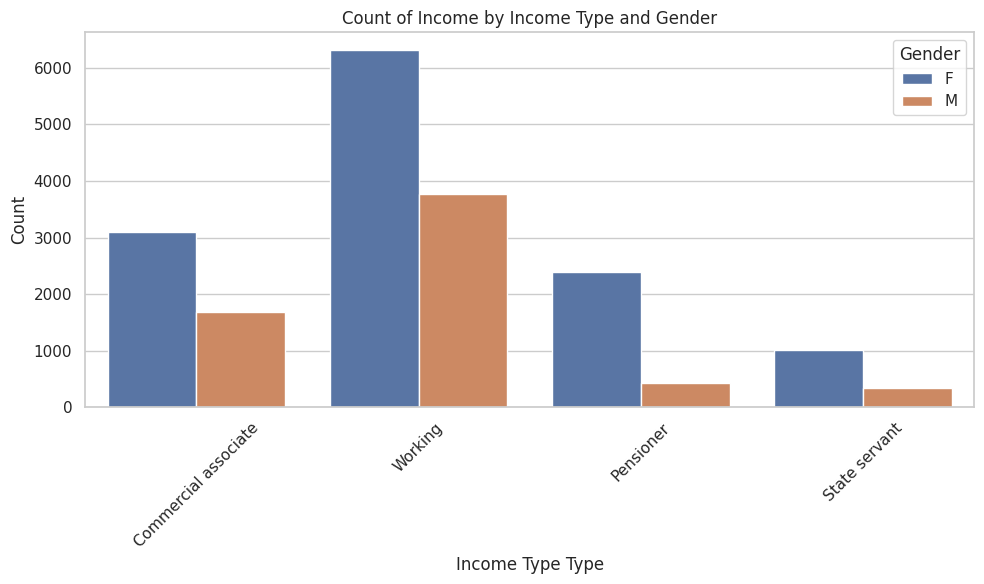

In [8]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.countplot(x="NAME_INCOME_TYPE", hue="CODE_GENDER", data=df)


plt.title("Count of Income by Income Type and Gender")
plt.xlabel("Income Type Type")
plt.ylabel("Count")


plt.xticks(rotation=45)
plt.legend(title="Gender", loc="upper right")
plt.tight_layout()
plt.show()

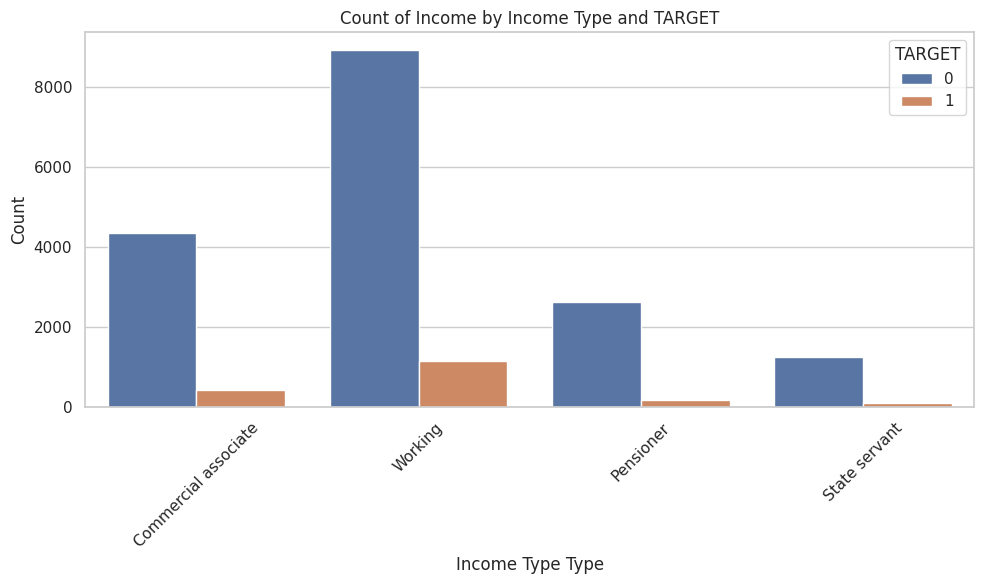

In [9]:
sns.set(style="whitegrid")


plt.figure(figsize=(10, 6))
sns.countplot(x="NAME_INCOME_TYPE", hue="TARGET", data=df)


plt.title("Count of Income by Income Type and TARGET")
plt.xlabel("Income Type Type")
plt.ylabel("Count")


plt.xticks(rotation=45)
plt.legend(title="TARGET", loc="upper right")
plt.tight_layout()
plt.show()

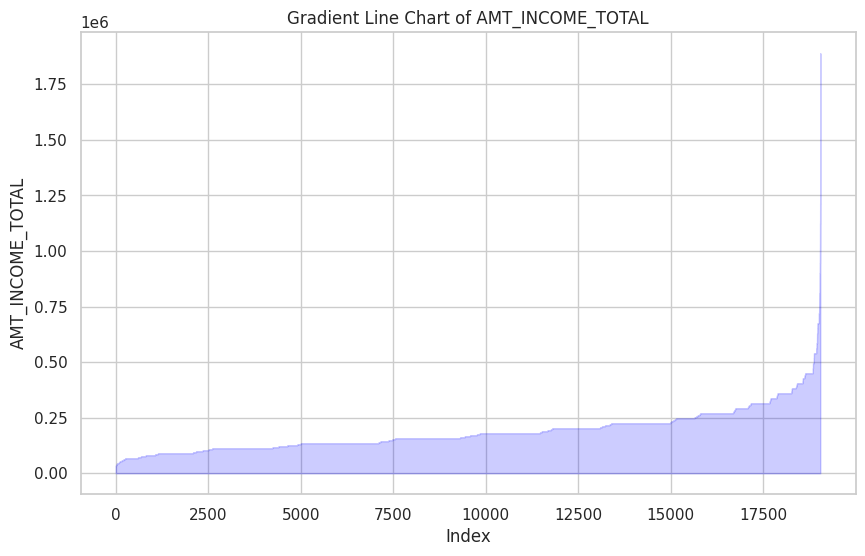

In [10]:
df_sorted = df.sort_values(by='AMT_INCOME_TOTAL')

cmap = sns.color_palette("viridis", as_cmap=True)

plt.figure(figsize=(10, 6))
plt.fill_between(np.arange(len(df_sorted)), df_sorted['AMT_INCOME_TOTAL'], color='blue', alpha=0.2)
plt.xlabel('Index')
plt.ylabel('AMT_INCOME_TOTAL')
plt.title('Gradient Line Chart of AMT_INCOME_TOTAL')
plt.show()

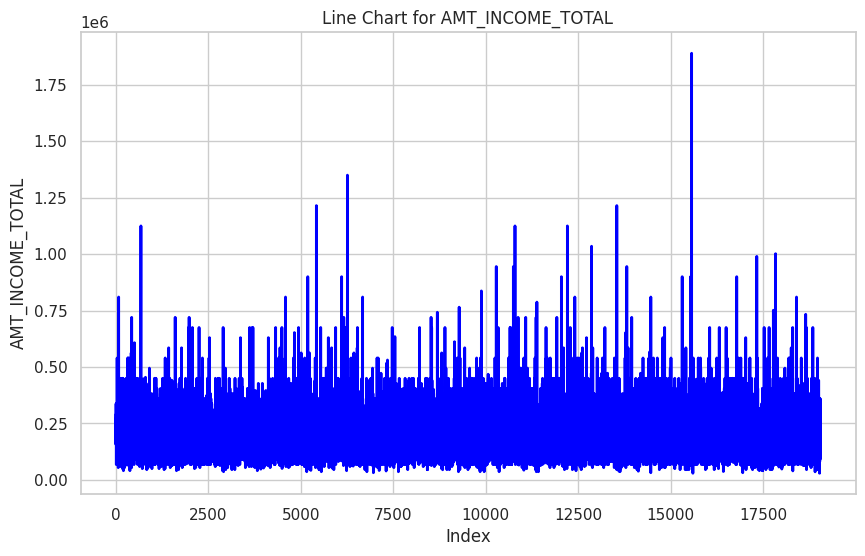

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(df['AMT_INCOME_TOTAL'], linewidth=2, color='blue')

plt.title('Line Chart for AMT_INCOME_TOTAL')
plt.xlabel('Index')
plt.ylabel('AMT_INCOME_TOTAL')

plt.show()

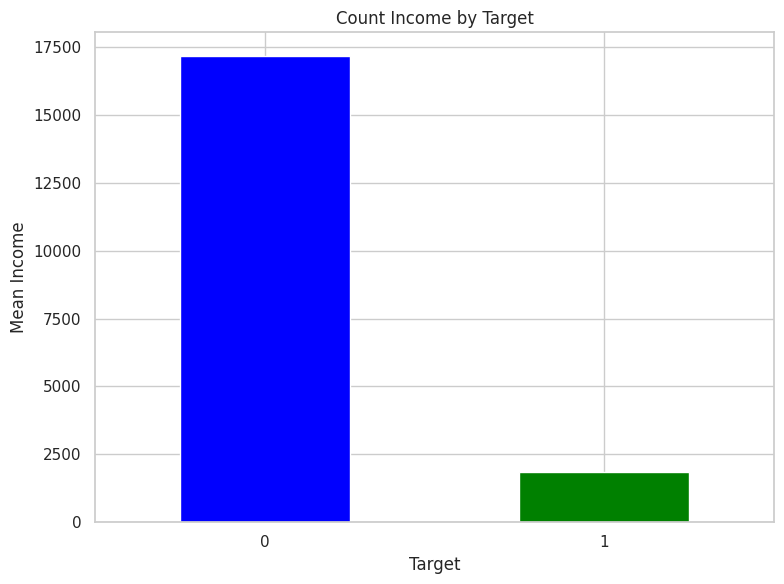

In [12]:
mean_income_by_label = df.groupby('TARGET')['AMT_INCOME_TOTAL'].count()

# Create bar plot
plt.figure(figsize=(8, 6))
mean_income_by_label.plot(kind='bar', color=['blue', 'green'])

# Add labels and title
plt.title('Count Income by Target')
plt.xlabel('Target')
plt.ylabel('Mean Income')
plt.xticks([0, 1], ['0', '1'], rotation=0)

# Show plot
plt.tight_layout()
plt.show()

In [13]:
label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = label_encoder.fit_transform(df[col])

In [14]:
df.info(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19043 entries, 0 to 19042
Data columns (total 279 columns):
 #    Column                                                       Dtype  
---   ------                                                       -----  
 0    SK_ID_CURR                                                   int64  
 1    TARGET                                                       int64  
 2    NAME_CONTRACT_TYPE                                           int64  
 3    CODE_GENDER                                                  int64  
 4    FLAG_OWN_CAR                                                 int64  
 5    FLAG_OWN_REALTY                                              int64  
 6    CNT_CHILDREN                                                 int64  
 7    AMT_INCOME_TOTAL                                             float64
 8    AMT_CREDIT_x                                                 float64
 9    AMT_ANNUITY_x                                              

In [15]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Completed_y,NAME_CONTRACT_STATUS_Demand_y,NAME_CONTRACT_STATUS_Signed_y
0,100043,0,0,0,0,1,2,198000.0,641173.5,23157.0,...,2,0.0,0.0,430.0,0,0,31.0,0.0,0.0,0.0
1,100100,0,0,1,1,1,2,202500.0,796396.5,38443.5,...,19,1.0,0.0,3606.0,12,12,91.0,0.0,0.0,2.0
2,100131,0,0,0,0,1,0,270000.0,891072.0,45625.5,...,74,0.0,35.0,259.0,0,0,23.0,0.0,0.0,0.0
3,100139,0,0,0,0,0,1,157500.0,302341.5,24016.5,...,88,0.0,15.0,2775.0,19,19,74.0,0.0,0.0,0.0
4,100145,0,0,0,1,1,1,202500.0,260725.5,16789.5,...,0,0.0,0.0,2091.0,0,0,96.0,0.0,0.0,0.0


In [16]:
duplicate_rows = df.duplicated()
duplicate_rows.sum()

0

In [17]:
df['TARGET'].value_counts()

0    17177
1     1866
Name: TARGET, dtype: int64

In [18]:
def handle_outliers_zscore(df, threshold=3):
    df_cleaned = df.copy()
    for col in df.columns:
      if col != 'TARGET':
          z_scores = stats.zscore(df[col])
          abs_z_scores = abs(z_scores)
          outliers = abs_z_scores > threshold
          df_cleaned[col][outliers] = df[col].median()  # Replace outliers with median
    return df_cleaned

In [19]:
dfClean = handle_outliers_zscore(df)
# dfClean = df.copy()
# print("DataFrame with outliers handled:")
# print(dfClean)
dfClean.head()

<ipython-input-18-6ed780f60930>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col][outliers] = df[col].median()  # Replace outliers with median
<ipython-input-18-6ed780f60930>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col][outliers] = df[col].median()  # Replace outliers with median
<ipython-input-18-6ed780f60930>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col][outliers] = df[col].median

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,...,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,SK_DPD_y,SK_DPD_DEF_y,NAME_CONTRACT_STATUS_Active_y,NAME_CONTRACT_STATUS_Completed_y,NAME_CONTRACT_STATUS_Demand_y,NAME_CONTRACT_STATUS_Signed_y
0,100043,0,0,0,0,1,2,198000.0,641173.5,23157.0,...,2,0.0,0.0,430.0,0,0,31.0,0.0,0.0,0.0
1,100100,0,0,1,1,1,2,202500.0,796396.5,38443.5,...,19,1.0,0.0,3606.0,12,12,91.0,0.0,0.0,2.0
2,100131,0,0,0,0,1,0,270000.0,891072.0,45625.5,...,74,0.0,35.0,259.0,0,0,23.0,0.0,0.0,0.0
3,100139,0,0,0,0,0,1,157500.0,302341.5,24016.5,...,88,0.0,15.0,2775.0,19,19,74.0,0.0,0.0,0.0
4,100145,0,0,0,1,1,1,202500.0,260725.5,16789.5,...,0,0.0,0.0,2091.0,0,0,96.0,0.0,0.0,0.0


In [20]:
dfClean['TARGET'].value_counts()

0    17177
1     1866
Name: TARGET, dtype: int64

In [21]:
for i in range(0, 278, 30):
    j = min(i + 30, 278)  # Ensure j does not exceed the number of columns
    nan_count = dfClean.iloc[:, i:j].isnull().sum() / 19043 * 100
    print(f"Number of NaN values in columns {i} to {j-1}:")
    print(nan_count)

Number of NaN values in columns 0 to 29:
SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT_x                   0.0
AMT_ANNUITY_x                  0.0
AMT_GOODS_PRICE_x              0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
CNT_FAM_MEMBER

In [22]:
dfClean['TARGET'].value_counts()

0    17177
1     1866
Name: TARGET, dtype: int64

In [23]:
def evaluation(Y_test,Y_pred):
    acc = accuracy_score(Y_test,Y_pred)
    rcl = recall_score(Y_test,Y_pred,average = 'weighted')
    f1 = f1_score(Y_test,Y_pred,average = 'weighted')
    ps = precision_score(Y_test,Y_pred,average = 'weighted')

    metric_dict={'accuracy': round(acc,3),
               'recall': round(rcl,3),
               'F1 score': round(f1,3),
               'Precision score': round(ps,3)
              }

    return print(metric_dict)

In [24]:
feature =np.array(dfClean.drop(columns = ['SK_ID_CURR','TARGET']))
label = np.array(dfClean['TARGET'])

In [25]:
nearmiss = NearMiss()
featureResample, labelResample = nearmiss.fit_resample(feature, label)

In [26]:
from sklearn.preprocessing import MinMaxScaler


In [27]:
scaler = StandardScaler()

featureStandard = scaler.fit_transform(featureResample)

# scaler = MinMaxScaler()
# featureStandard = scaler.fit_transform(featureResample)


In [28]:
pca = PCA(n_components=100)

featureSPCA = pca.fit_transform(featureStandard)

print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.15857847 0.06239192 0.04140166 0.03190996 0.023198   0.02184904
 0.02043869 0.01778212 0.01647784 0.01496669 0.01411464 0.01360951
 0.01255678 0.01208082 0.01204478 0.01117786 0.01092278 0.01045381
 0.01039704 0.00983161 0.00960864 0.00952797 0.00934644 0.00914638
 0.00885625 0.00833757 0.00807146 0.00786691 0.00776792 0.00754947
 0.00741801 0.00731432 0.00707953 0.00699522 0.00685453 0.00681798
 0.00675924 0.00671963 0.00665005 0.0066328  0.00653997 0.00641809
 0.00639247 0.00627231 0.00626193 0.00619767 0.00612935 0.00611022
 0.00605031 0.0059573  0.00589824 0.00586919 0.0058367  0.00570635
 0.00568831 0.00556089 0.00553396 0.00551285 0.00547485 0.0053723
 0.00536222 0.00530481 0.00522813 0.00513714 0.00511715 0.00505341
 0.00498113 0.00495982 0.00486442 0.00482583 0.00475149 0.0047094
 0.00463418 0.00453051 0.00444849 0.0043532  0.00427414 0.00424815
 0.00418132 0.00411841 0.00399548 0.00388961 0.00381953 0.00368519
 0.00366799 0.00359623 0.00348143 0.00

In [29]:
x_train,x_test,y_train,y_test = train_test_split(featureSPCA,labelResample, test_size = 0.15 , random_state = 42)

In [30]:
lrModel = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

model = GridSearchCV(estimator=lrModel, param_grid=param_grid, cv=4)
model.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
24 fits failed out of a total of 48.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=4, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

In [31]:
y_pred_lr = model.predict(x_test)
y_train_lr = model.predict(x_train)

print("Logistic Regression Model:")
accuracy_LR_smote = round(accuracy_score(y_test,y_pred_lr),3)
accuracy_LR_smote2 = round(accuracy_score(y_train,y_train_lr),3)
print("Accuracy Test:", accuracy_LR_smote)
print("Accuracy Train:", accuracy_LR_smote2)
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Model:
Accuracy Test: 0.85
Accuracy Train: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       301
           1       0.90      0.76      0.82       259

    accuracy                           0.85       560
   macro avg       0.86      0.84      0.85       560
weighted avg       0.86      0.85      0.85       560



In [32]:
evaluation(y_test,y_pred_lr)

{'accuracy': 0.85, 'recall': 0.85, 'F1 score': 0.848, 'Precision score': 0.857}


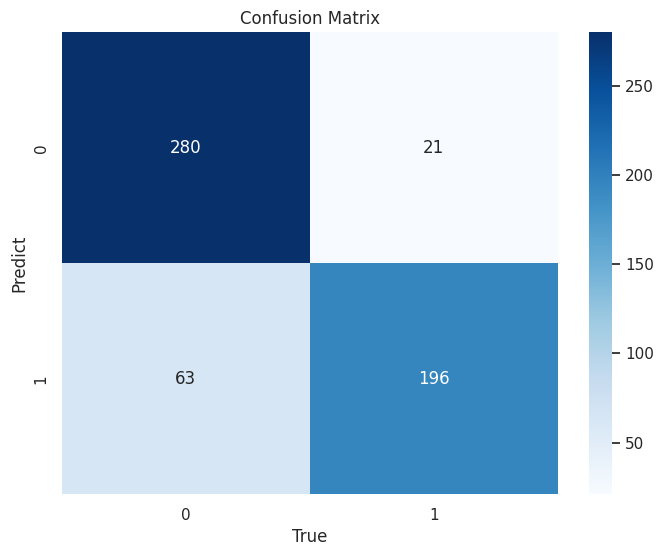

In [33]:
cm = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [34]:
rf_model = RandomForestClassifier()

param_grid = {
    'n_estimators': [100, 200],
    'min_samples_split': [2, 5],
    'max_features': ['auto', 'sqrt'],
}

model = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=4)
model.fit(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['auto', 'sqrt'],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]})

In [35]:
y_pred_rf = model.predict(x_test)
y_pred_rf2 = model.predict(x_train)

print("Random Forest Model:")
accuracy_RF = round(accuracy_score(y_test,y_pred_rf),3)
accuracy_RF2 = round(accuracy_score(y_train,y_pred_rf2),3)
print("Accuracy Test:", accuracy_RF)
print("Accuracy Train:", accuracy_RF2)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Model:
Accuracy Test: 0.818
Accuracy Train: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       301
           1       0.85      0.73      0.79       259

    accuracy                           0.82       560
   macro avg       0.82      0.81      0.81       560
weighted avg       0.82      0.82      0.82       560



In [36]:
evaluation(y_test,y_pred_rf)

{'accuracy': 0.818, 'recall': 0.818, 'F1 score': 0.816, 'Precision score': 0.822}


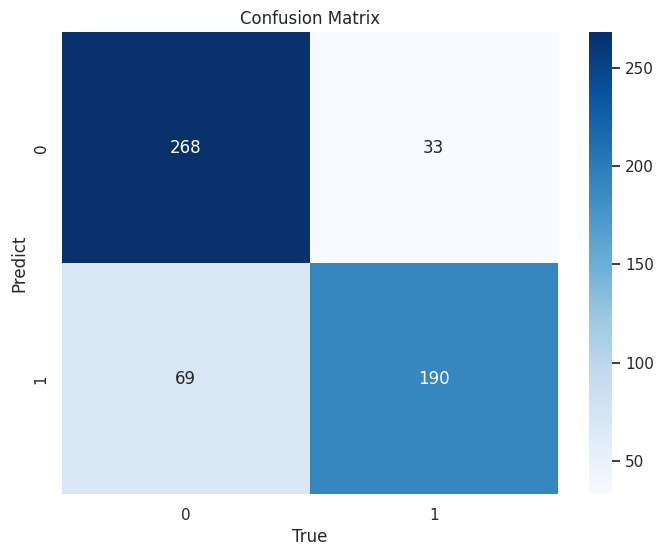

In [37]:
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [38]:
knn_model = KNeighborsClassifier()


param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

model = GridSearchCV(estimator=knn_model, param_grid=param_grid, cv=4)

model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']})

In [39]:
y_pred_knn = model.predict(x_test)
y_pred_knn2 = model.predict(x_train)

print("KNN Model:")
accuracy_KNN = round(accuracy_score(y_test,y_pred_knn),3)
accuracy_KNN2 = round(accuracy_score(y_train,y_pred_knn2),3)
print("Accuracy Test:", accuracy_KNN)
print("Accuracy Train:", accuracy_KNN2)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

KNN Model:
Accuracy Test: 0.771
Accuracy Train: 0.8
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       301
           1       0.88      0.59      0.70       259

    accuracy                           0.77       560
   macro avg       0.80      0.76      0.76       560
weighted avg       0.80      0.77      0.76       560



In [40]:
evaluation(y_test,y_pred_knn)

{'accuracy': 0.771, 'recall': 0.771, 'F1 score': 0.763, 'Precision score': 0.795}


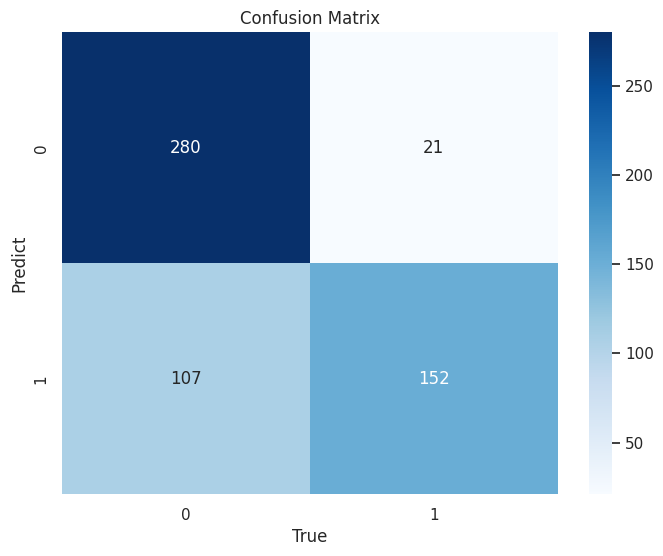

In [41]:
cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [42]:
xgb_model = XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7]
}

model = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=4)

model.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000]})

In [43]:
y_pred_XGB = model.predict(x_test)
y_pred_XGB2 = model.predict(x_train)

print("XGB Model:")
accuracy_XGB = round(accuracy_score(y_test,y_pred_XGB),3)
accuracy_XGB2 = round(accuracy_score(y_train,y_pred_XGB2),3)
print("Accuracy Test:", accuracy_XGB)
print("Accuracy Train:", accuracy_XGB2)
print("Classification Report:")
print(classification_report(y_test, y_pred_XGB))

XGB Model:
Accuracy Test: 0.848
Accuracy Train: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       301
           1       0.90      0.75      0.82       259

    accuracy                           0.85       560
   macro avg       0.86      0.84      0.84       560
weighted avg       0.86      0.85      0.85       560



In [44]:
evaluation(y_test,y_pred_XGB)

{'accuracy': 0.848, 'recall': 0.848, 'F1 score': 0.846, 'Precision score': 0.855}


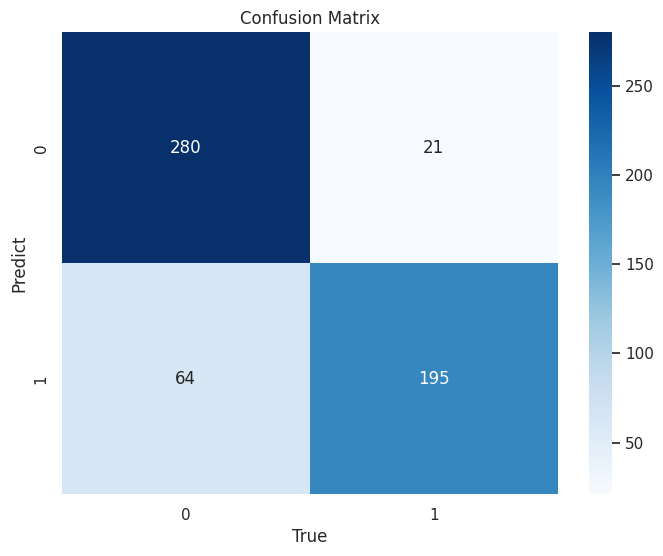

In [45]:
cm = confusion_matrix(y_test, y_pred_XGB)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [46]:
svc_model = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

model = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=4)

model.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']})

In [47]:
y_pred_svc = model.predict(x_test)
y_pred_svc2 = model.predict(x_train)

print("SVC Model:")
accuracy_svc = round(accuracy_score(y_test,y_pred_svc),3)
accuracy_svc2 = round(accuracy_score(y_train,y_pred_svc2),3)
print("Accuracy Test:", accuracy_svc)
print("Accuracy Train:", accuracy_svc2)
print("Classification Report:")
print(classification_report(y_test, y_pred_svc))

SVC Model:
Accuracy Test: 0.845
Accuracy Train: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.95      0.87       301
           1       0.92      0.73      0.81       259

    accuracy                           0.84       560
   macro avg       0.86      0.84      0.84       560
weighted avg       0.86      0.84      0.84       560



In [48]:
evaluation(y_test,y_pred_svc)

{'accuracy': 0.845, 'recall': 0.845, 'F1 score': 0.842, 'Precision score': 0.857}


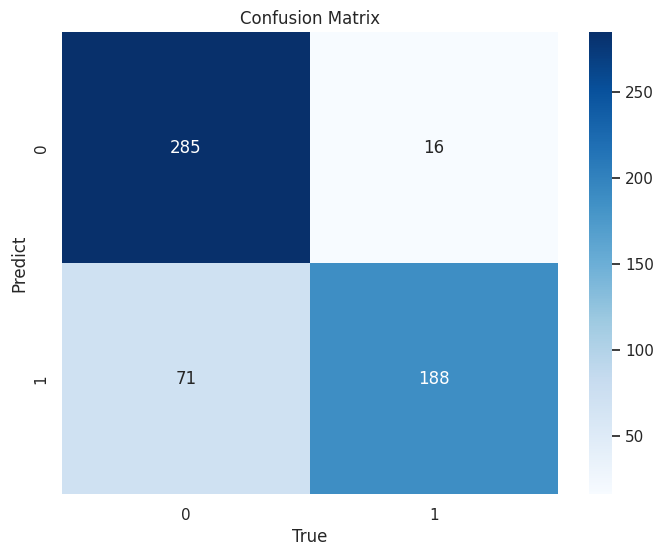

In [49]:
cm = confusion_matrix(y_test, y_pred_svc)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()